# Project Outline
## Import/Download the Data
* The financial data you use in this project is up to you. You can access financial data using one of the APIs accessed through the pandas-datareader package or from websites such as Yahoo Finance. Make sure to find data for at least, but not limited to, four (4) stocks to include in your analysis.

* Load the data into a pandas DataFrame so you can easily view and manipulate the data.

## Calculate Financial Statistics
* Calculate some of the financial statistics you have learned about to gain insights into the stocks and how they relate to each other. What are the returns of the stocks over different time periods? How risky are each of the stocks when compared to each other? Do the returns of the stocks correlate with each other, or are they diversified?

## Optimized Portfolio
* Perform a mean-variance portfolio optimization that shows the efficient frontier for the group of stocks you have selected. If the investor is less risky, how should she allocate her funds across the portfolio? If she is more risky, how should she allocate her funds? Indicate multiple investment options at different risk levels and specify the returns.

## Create Your Presentation
We want to see:

* information about the stocks you utilized (industry, sector, background, news)
* the key financial statistics about the stocks and how you interpret them
* a few different portfolio options with the stock weights and why the investor would select that portfolio
* an overall conclusion to the client about your recommendations

# Imports

In [884]:
import pandas as pd
import numpy as np
import seaborn as sns
import pandas_datareader.data as web
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import random

In [886]:
import cvxopt as opt
from cvxopt import blas, solvers

# First Portfolio
Coca Cola (KO), JP Morgan Chase (JPM), Tesla (TSLA), Hewlett Packard (HPE), FireEye (FEYE), and Amazon (AMZN) 

# Stock Analysis
* Pull in stock data from Yahoo API for Coca Cola (KO), JP Morgan Chase (JPM), Tesla (TSLA), Hewlett Packard (HPE), FireEye (FEYE), and Amazon (AMZN) from 7 January 2020 to 7 January 2021

In [887]:
symbols = ['KO','JPM','TSLA','HPE','FEYE','AMZN']
start_date = datetime(2020, 1, 7)
end_date = datetime(2021, 1, 7)
stock_data = web.get_data_yahoo(symbols, start_date, end_date)

In [888]:
stock_data

Attributes  Adj Close                                                \
Symbols            KO         JPM        TSLA        HPE       FEYE   
Date                                                                  
2020-01-07  52.454960  131.016678   93.811996  14.969550  18.160000   
2020-01-08  52.551643  132.038727   98.428001  15.084407  17.250000   
2020-01-09  53.508888  132.520844   96.267998  14.998263  16.930000   
2020-01-10  53.692600  131.199890   95.629997  14.806838  16.969999   
2020-01-13  54.272751  132.289413  104.972000  14.883409  16.920000   
...               ...         ...         ...        ...        ...   
2020-12-31  54.840000  126.161423  705.669983  11.850000  23.059999   
2021-01-04  52.759998  124.970001  729.770020  11.570000  21.860001   
2021-01-05  52.180000  125.650002  735.109985  11.780000  21.865000   
2021-01-06  50.520000  131.550003  755.979980  12.040000  21.570000   
2021-01-07  49.959999  135.869995  816.039978  11.970000  22.770000   

Attributes                   Close                                 ...  \
Symbols            AMZN         KO         JPM        TSLA    HPE  ...   
Date                                                               ...   
2020-01-07  1906.859985  54.250000  135.880005   93.811996  15.64  ...   
2020-01-08  1891.969971  54.349998  136.940002   98.428001  15.76  ...   
2020-01-09  1901.050049  55.340000  137.440002   96.267998  15.67  ...   
2020-01-10  1883.160034  55.529999  136.070007   95.629997  15.47  ...   
2020-01-13  1891.300049  56.130001  137.199997  104.972000  15.55  ...   
...                 ...        ...         ...         ...    ...  ...   
2020-12-31  3256.929932  54.840000  127.070000  705.669983  11.85  ...   
2021-01-04  3186.629883  52.759998  125.870003  729.770020  11.57  ...   
2021-01-05  3218.510010  52.180000  125.650002  735.109985  11.78  ...   
2021-01-06  3138.379883  50.520000  131.550003  755.979980  12.04  ...   
2021-01-07  3162.159912  49.959999  135.869995  816.039978  11.97  ...   

Attributes        Open                                     Volume              \
Symbols           TSLA    HPE       FEYE         AMZN          KO         JPM   
Date                                                                            
2020-01-07   92.279999  15.69  18.010000  1904.500000   9973900.0  10531300.0   
2020-01-08   94.739998  15.57  17.809999  1898.040039  10676000.0   9695300.0   
2020-01-09   99.419998  15.80  17.309999  1909.890015  15398000.0   9469000.0   
2020-01-10   96.358002  15.67  16.980000  1905.369995  13040100.0  10190900.0   
2020-01-13   98.699997  15.47  17.040001  1891.310059  14302900.0  12355200.0   
...                ...    ...        ...          ...         ...         ...   
2020-12-31  699.989990  11.67  23.129999  3275.000000   8493700.0   8577800.0   
2021-01-04  719.460022  11.90  22.760000  3270.000000  25611100.0  16819900.0   
2021-01-05  723.659973  11.57  21.650000  3166.010010  20323800.0  13731200.0   
2021-01-06  758.489990  11.96  21.490000  3146.479980  38724500.0  24909100.0   
2021-01-07  777.630005  12.16  21.870001  3157.000000  53225700.0  21940400.0   

Attributes                                                  
Symbols            TSLA         HPE        FEYE       AMZN  
Date                                                        
2020-01-07   89410500.0   8548500.0   9006600.0  4044900.0  
2020-01-08  155721500.0   7624900.0   5678500.0  3508000.0  
2020-01-09  142202000.0  10668500.0   5282600.0  3167300.0  
2020-01-10   64797500.0   7536800.0   3719300.0  2853700.0  
2020-01-13  132588000.0  10123800.0   3026700.0  2780800.0  
...                 ...         ...         ...        ...  
2020-12-31   49570900.0   5700700.0   5831200.0  2954100.0  
2021-01-04   48638200.0   8007200.0  13543500.0  4411400.0  
2021-01-05   32245200.0  10969100.0   5719200.0  2655500.0  
2021-01-06   44700000.0   9752200.0   7473600.0  4394800.0  
2021-01-07   51498900.0  10019700.0   79

In [889]:
#flatten pivot table to df
stock_data_df = pd.DataFrame(stock_data['Adj Close'].to_records())
stock_data_df.columns = [hdr.replace("('symbols', ", "date.").replace(")", "") \
                     for hdr in stock_data_df.columns]

In [890]:
stock_data_df

,Date,KO,JPM,TSLA,HPE,FEYE,AMZN
0,2020-01-07,52.454960,131.016678,93.811996,14.969550,18.160000,1906.859985
1,2020-01-08,52.551643,132.038727,98.428001,15.084407,17.250000,1891.969971
2,2020-01-09,53.508888,132.520844,96.267998,14.998263,16.930000,1901.050049
3,2020-01-10,53.692600,131.199890,95.629997,14.806838,16.969999,1883.160034
4,2020-01-13,54.272751,132.289413,104.972000,14.883409,16.920000,1891.300049
...,...,...,...,...,...,...,...
249,2020-12-31,54.840000,126.161423,705.669983,11.850000,23.059999,3256.929932
250,2021-01-04,52.759998,124.970001,729.770020,11.570000,21.860001,3186.629883
251,2021-01-05,52.180000,125.650002,735.109985,11.780000,21.865000,3218.510010
252,2021-01-06,50.520000,131.550003,755.979980,12.040000,21.570000,3138.379883


# Plot the Adjusted Closing Price over Time

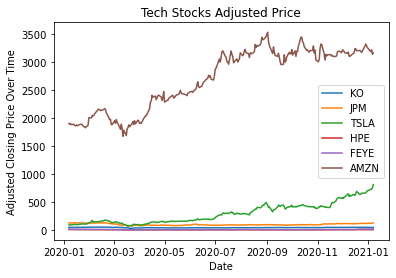

In [891]:
plt.plot(stock_data.index, stock_data["Adj Close"])
plt.xlabel("Date")
plt.ylabel("Adjusted Closing Price Over Time")
plt.title("Tech Stocks Adjusted Price")
plt.legend(symbols)
plt.savefig("CapstoneOpt1_AdjPrice.png")
plt.show()

# Calculate and plot the daily simple rate of return over time.
* Create a plot with matplotlib that shows the daily simple rate of return for each tech stock over time. Label the graph appropriately. 
* Create subplots for each stock showing daily simple rate of return

In [892]:
selected=list(stock_data.columns[0:])

returns_quarterly = stock_data[selected].pct_change()

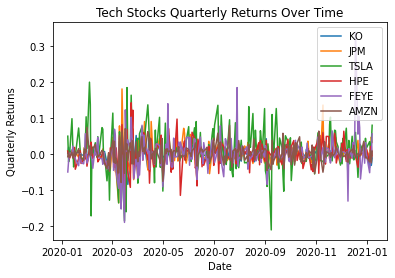

In [893]:
plt.plot(returns_quarterly.index, returns_quarterly["Adj Close"])
plt.xlabel("Date")
plt.ylabel("Quarterly Returns")
plt.title("Tech Stocks Quarterly Returns Over Time")
plt.legend(symbols)
plt.savefig("CapstoneOpt1_QuarterlyReturns.png")
plt.show()


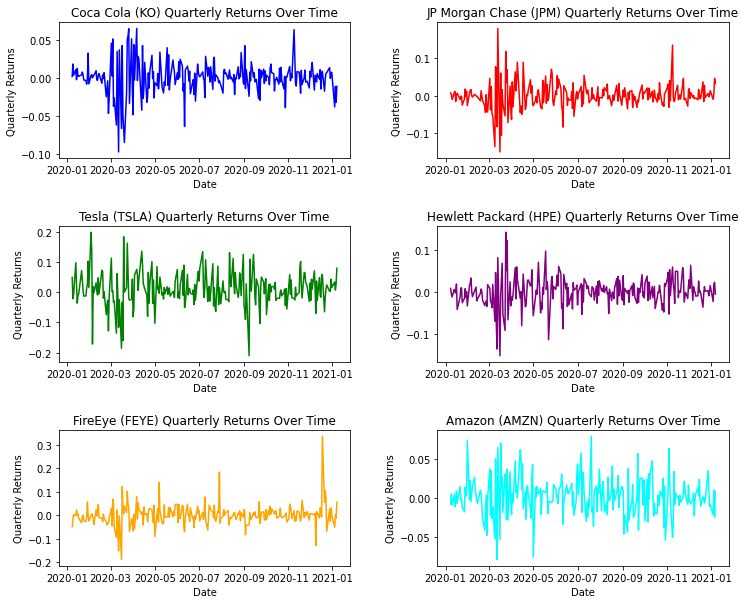

In [894]:
plt.figure(figsize=(12,10))
ax1=plt.subplot(3, 2, 1)
plt.plot(returns_quarterly.index, returns_quarterly["Adj Close"]["KO"], color='blue')
plt.xlabel("Date")
plt.ylabel("Quarterly Returns")
plt.title("Coca Cola (KO) Quarterly Returns Over Time")
ax2=plt.subplot(3, 2, 2)
plt.plot(returns_quarterly.index, returns_quarterly["Adj Close"]["JPM"], color='red')
plt.xlabel("Date")
plt.ylabel("Quarterly Returns")
plt.title("JP Morgan Chase (JPM) Quarterly Returns Over Time")
ax3=plt.subplot(3, 2, 3)
plt.plot(returns_quarterly.index, returns_quarterly["Adj Close"]["TSLA"], color='green')
plt.xlabel("Date")
plt.ylabel("Quarterly Returns")
plt.title("Tesla (TSLA) Quarterly Returns Over Time")
ax4=plt.subplot(3, 2, 4)
ax4.plot(returns_quarterly.index, returns_quarterly["Adj Close"]["HPE"], color='purple')
plt.xlabel("Date")
plt.ylabel("Quarterly Returns")
plt.title("Hewlett Packard (HPE) Quarterly Returns Over Time")
ax4=plt.subplot(3, 2, 5)
ax4.plot(returns_quarterly.index, returns_quarterly["Adj Close"]["FEYE"], color='orange')
plt.xlabel("Date")
plt.ylabel("Quarterly Returns")
plt.title("FireEye (FEYE) Quarterly Returns Over Time")
ax4=plt.subplot(3, 2, 6)
ax4.plot(returns_quarterly.index, returns_quarterly["Adj Close"]["AMZN"], color='cyan')
plt.xlabel("Date")
plt.ylabel("Quarterly Returns")
plt.title("Amazon (AMZN) Quarterly Returns Over Time")

plt.subplots_adjust(wspace=0.3)
plt.subplots_adjust(hspace=0.5)
plt.savefig("CapstoneOpt1_SubplotsEachStock_Returns.png")
plt.show()


# Calculate and plot the mean of each tech stock's daily simple rate of return

1) Calculate mean rate of return
    * For each stock, calculate the mean daily simple rate of return.
2) Plot bar chart
    * Use matplotlib to create a bar chart comparing the mean daily simple rate of return for each stock. Label the chart appropriately
3) Analyze mean rate of return
    * Based on the mean rate of return, which stock would be the best option to invest in?

In [895]:
expected_returns = returns_quarterly.mean()

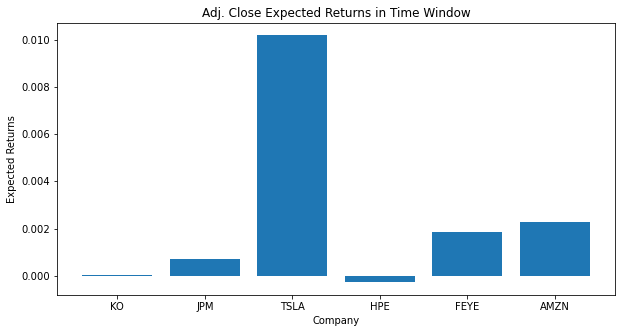

In [896]:
fig, ax = plt.subplots(figsize=(10, 5))
plt.bar(range(len(expected_returns["Adj Close"])),expected_returns["Adj Close"]) 
ax.set_xticks(range(len(expected_returns["Adj Close"])))
ax.set_xticklabels(['KO','JPM','TSLA','HPE','FEYE','AMZN'])
plt.xlabel("Company")
plt.ylabel("Expected Returns")
plt.title("Adj. Close Expected Returns in Time Window")
plt.savefig("CapstoneOpt1_ExpectedReturns.png")
plt.show()


In [897]:
print("Coca Cola (KO): ", expected_returns["Adj Close"]["KO"])
print("JP Morgan (JPM): ", expected_returns["Adj Close"]["JPM"])
print("Tesla (TSLA): ", expected_returns["Adj Close"]["TSLA"])
print("Hewlett Packard (HPE): ", expected_returns["Adj Close"]["HPE"])
print("FireEye (FEYE): ", expected_returns["Adj Close"]["FEYE"])
print("Amazon (AMZN): ", expected_returns["Adj Close"]["AMZN"])

Coca Cola (KO):  5.147990854047855e-05
JP Morgan (JPM):  0.0007303058229352663
Tesla (TSLA):  0.01017754413026511
Hewlett Packard (HPE):  -0.00028149681790959325
FireEye (FEYE):  0.0018511653283130192
Amazon (AMZN):  0.0022943274434328487


# Calculate and plot the variance.

1) Calculate the variance
    * For each stock, calculate the variance of the mean daily simple rate of return.
2) Plot bar chart
    * Use matplotlib to create a bar chart comparing the variance for each stock. Label the chart appropriately
3) Analyse the variance
    * Based on the variance, which stock would be the riskiest to invest in?

In [898]:
returns_var = returns_quarterly.var()

In [899]:
returns_var

Attributes  Symbols
Adj Close   KO         0.000486
            JPM        0.001183
            TSLA       0.003181
            HPE        0.001195
            FEYE       0.001986
            AMZN       0.000590
Close       KO         0.000484
            JPM        0.001184
            TSLA       0.003181
            HPE        0.001196
            FEYE       0.001986
            AMZN       0.000590
High        KO         0.000331
            JPM        0.000783
            TSLA       0.002959
            HPE        0.000854
            FEYE       0.001721
            AMZN       0.000464
Low         KO         0.000489
            JPM        0.000734
            TSLA       0.002833
            HPE        0.000984
            FEYE       0.001417
            AMZN       0.000471
Open        KO         0.000523
            JPM        0.000925
            TSLA       0.003872
            HPE        0.001061
            FEYE       0.001752
            AMZN       0.000696
Volume      KO      

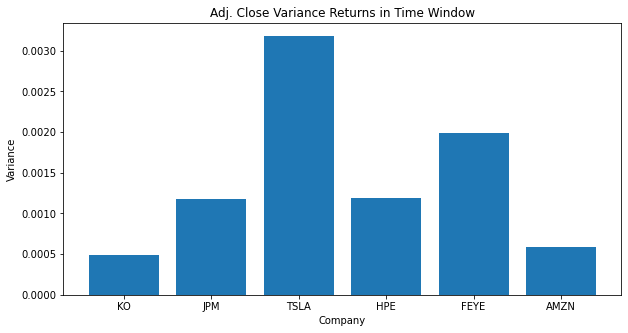

In [900]:
fig, ax = plt.subplots(figsize=(10, 5))
plt.bar(range(len(returns_var["Adj Close"])),returns_var["Adj Close"]) 
ax.set_xticks(range(len(returns_var["Adj Close"])))
ax.set_xticklabels(['KO','JPM','TSLA','HPE','FEYE','AMZN'])
plt.xlabel("Company")
plt.ylabel("Variance")
plt.title("Adj. Close Variance Returns in Time Window")
plt.savefig("CapstoneOpt1_VarianceReturns.png")
plt.show()


In [901]:
print("Coca Cola (KO): ", returns_var["Adj Close"]["KO"])
print("JP Morgan (JPM): ", returns_var["Adj Close"]["JPM"])
print("Tesla (TSLA): ", returns_var["Adj Close"]["TSLA"])
print("Hewlett Packard (HPE): ", returns_var["Adj Close"]["HPE"])
print("FireEye (FEYE): ", returns_var["Adj Close"]["FEYE"])
print("Amazon (AMZN): ", returns_var["Adj Close"]["AMZN"])

Coca Cola (KO):  0.00048597776334278174
JP Morgan (JPM):  0.0011827405537279143
Tesla (TSLA):  0.003180941937134724
Hewlett Packard (HPE):  0.0011954793011836567
FireEye (FEYE):  0.0019863430609533797
Amazon (AMZN):  0.0005903026677479819


Tesla shows the highest variance from 1 January 2020 to 1 January 2021 indicating it could be a riskier investment. While Coca Cola shows the least variance indicating it could be the least risky investment out of the six. 

# Calculate and plot the standard deviation

1) Calculate the standard deviation
    * For each stock, calculate the standard deviation of the mean daily simple rate of return.

2) Plot the bar chart
    * Use matplotlib to create a bar chart comparing the standard deviation of the mean daily simple rate of return of each stock. Label the chart appropriately

3) Analyze the standard deviation
    * Based on the standard deviation of the rates of return, which stock would you choose to invest in and why?

In [902]:
std_returns = returns_quarterly.std()

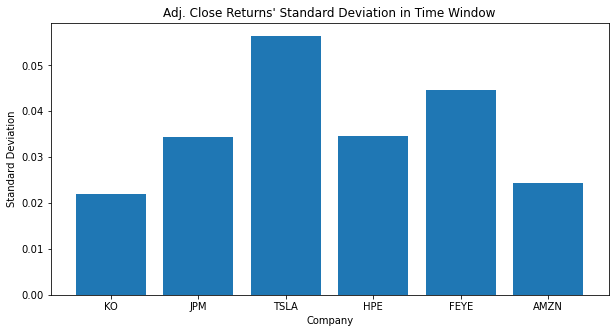

In [903]:
fig, ax = plt.subplots(figsize=(10, 5))
plt.bar(range(len(std_returns["Adj Close"])),std_returns["Adj Close"]) 
ax.set_xticks(range(len(std_returns["Adj Close"])))
ax.set_xticklabels(['KO','JPM','TSLA','HPE','FEYE','AMZN'])
plt.xlabel("Company")
plt.ylabel("Standard Deviation")
plt.title("Adj. Close Returns' Standard Deviation in Time Window")
plt.savefig("CapstoneOpt1_Returns_Stdv.png")
plt.show()


In [904]:
print("Coca Cola (KO): ", std_returns["Adj Close"]["KO"])
print("JP Morgan (JPM): ", std_returns["Adj Close"]["JPM"])
print("Tesla (TSLA): ", std_returns["Adj Close"]["TSLA"])
print("Hewlett Packard (HPE): ", std_returns["Adj Close"]["HPE"])
print("FireEye (FEYE): ", std_returns["Adj Close"]["FEYE"])
print("Amazon (AMZN): ", std_returns["Adj Close"]["AMZN"])

Coca Cola (KO):  0.02204490334165205
JP Morgan (JPM):  0.0343909952418931
Tesla (TSLA):  0.05639983986798831
Hewlett Packard (HPE):  0.03457570391450703
FireEye (FEYE):  0.04456840877744436
Amazon (AMZN):  0.02429614512115002


Tesla is the most volatile stock but it also has the most mean return. This means that the the stock on average is making more money than the others. Coca Cola is the least volatile of the bunch and has the least mean return.

Amazon and Tesla are in tech industries. Some of their subsidiaries are in similar industries like commercial space research.  Taking into account the variance and the mean return, it is interesting that Tesla is a more volatile stock in terms of variance but has a higher mean return than Amazon which is significantly less volatile and has a lower mean return. 

# Calculate the correlations
Calculate the correlations between each of the stocks. Which stocks are positively correlated? Which are negatively correlated? Which have little correlation?

In [905]:
cov_returns = returns_quarterly["Adj Close"].cov()

In [906]:
cov_returns

Symbols,KO,JPM,TSLA,HPE,FEYE,AMZN
Symbols,,,,,,
KO,0.000486,0.000541,0.000364,0.000467,0.000343,0.000171
JPM,0.000541,0.001183,0.000601,0.000849,0.000578,0.000213
TSLA,0.000364,0.000601,0.003181,0.000569,0.000715,0.000623
HPE,0.000467,0.000849,0.000569,0.001195,0.000549,0.000229
FEYE,0.000343,0.000578,0.000715,0.000549,0.001986,0.000428
AMZN,0.000171,0.000213,0.000623,0.000229,0.000428,0.000590


Conclusions so far

All of these stocks appear positively correlated to a small degree. Amazon and Tesla are positively correlated to the highest degree (0.000624). Tesla and JP Morgan are correlated to the second highest degree (0.000595). Overall, the stocks are only minimally correlated to each other which makes me think they are well diversified.

In the past year, an investor would have made more money from investing in Tesla than Amazon. Investing in FireEye over the last few months of 2020 would have proven timely as their simple stock return increased. The other stocks--including Coca Cola, JP Morgan, and Hewlett Packard--were consistent in minimal simple and mean return. 

Each of the stocks are for companies in very different industries except for Tesla and Amazon which are both into a variety of tech endeavours. Tesla is into energy efficient luxury cars, solar systems for homes, and commercial space research. Tesla's company efforts led to space launches during the past year. Amazon is into online purchases, video streaming, and a variety of other niches. Both companies have done well over the past year. 

Each of the stocks plummeted in March 2020 as a likely outcome from the news of the pandemic. Each came back to its norm a month or two later while Tesla and Amazon continued to rise the rest of the year.

In [907]:
#fig = cov_returns.get_figure()
#fig.savefig(capstoneopt1_covreturnsdf.png) 

# Portfolio Optimization

In [908]:
expected_returns = returns_quarterly['Adj Close'].mean()

In [909]:
cov_returns = returns_quarterly['Adj Close'].cov()

In [910]:
# had to adjust this function from the class lesson as "can only concatenate tuple (not str) to tuple"
def return_portfolios(expected_returns, cov_matrix):
    np.random.seed(1)
    port_returns = []
    port_volatility = []
    stock_weights = []
    
    selected = (expected_returns.axes)[0]
    
    num_assets = len(selected) 
    num_portfolios = 5000
    
    for single_portfolio in range(num_portfolios):
        weights = np.random.random(num_assets)
        weights /= np.sum(weights)
        returns = np.dot(weights, expected_returns)
        volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
        port_returns.append(returns)
        port_volatility.append(volatility)
        stock_weights.append(weights)
    
    portfolio = {'Returns': port_returns,
                 'Volatility': port_volatility}
    for counter,symbol in enumerate(selected):
        portfolio[f"{symbol} Weight"] = [Weight[counter] for Weight in stock_weights]
    
    df = pd.DataFrame(portfolio)
    
    column_order = ['Returns', 'Volatility'] + [f"{stock} Weight" for stock in selected]
    
    df = df[column_order]
   
    return df

In [911]:
random_portfolios = return_portfolios(expected_returns, cov_returns) 
print(random_portfolios.head().round(4))

   Returns  Volatility  KO Weight  JPM Weight  TSLA Weight  HPE Weight  \
0   0.0006      0.0263     0.2484      0.4290       0.0001      0.1801   
1   0.0025      0.0251     0.0724      0.1344       0.1543      0.2095   
2   0.0010      0.0252     0.0742      0.3186       0.0099      0.2432   
3   0.0033      0.0276     0.0451      0.0636       0.2572      0.3110   
4   0.0013      0.0217     0.2978      0.3040       0.0289      0.0133   

   FEYE Weight  AMZN Weight  
0       0.0874       0.0550  
1       0.1630       0.2664  
2       0.1514       0.2027  
3       0.1007       0.2224  
4       0.0577       0.2984  


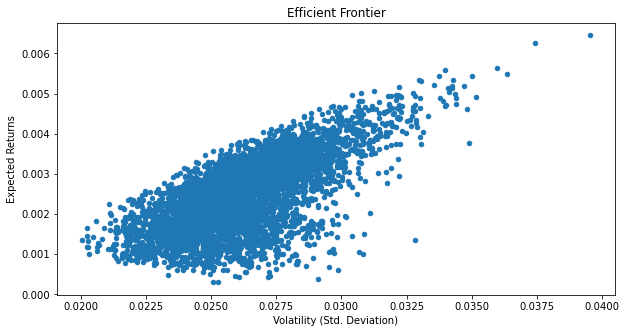

In [912]:
random_portfolios.plot.scatter(x='Volatility', y='Returns', figsize=(10,5))
plt.title("Efficient Frontier")
plt.xlabel("Volatility (Std. Deviation)")
plt.ylabel("Expected Returns")
plt.savefig("CapstoneOp1_EfficientFrontier_nooptimumline.png")
plt.show()


In [913]:
returns_quarterly = returns_quarterly['Adj Close']

In [914]:
n = returns_quarterly.shape[1]
n

6

In [915]:
#to_matrix() was deprecated so I replaced with ".values"
def optimal_portfolio(returns):
    n = returns.shape[1]
    returns = np.transpose(returns.values)

    N = 100
    mus = [10**(5.0 * t/N - 1.0) for t in range(N)]

    # Convert to cvxopt matrices
    S = opt.matrix(np.cov(returns))
    pbar = opt.matrix(np.mean(returns, axis=1))

    # Create constraint matrices
    G = -opt.matrix(np.eye(n))   # negative n x n identity matrix
    h = opt.matrix(0.0, (n ,1))
    A = opt.matrix(1.0, (1, n))
    b = opt.matrix(1.0)

    # Calculate efficient frontier weights using quadratic programming
    portfolios = [solvers.qp(mu*S, -pbar, G, h, A, b)['x']
                  for mu in mus]
    ## CALCULATE RISKS AND RETURNS FOR FRONTIER
    returns = [blas.dot(pbar, x) for x in portfolios]
    risks = [np.sqrt(blas.dot(x, S*x)) for x in portfolios]
    ## CALCULATE THE 2ND DEGREE POLYNOMIAL OF THE FRONTIER CURVE
    m1 = np.polyfit(returns, risks, 2)
    x1 = np.sqrt(m1[2] / m1[0])
    # CALCULATE THE OPTIMAL PORTFOLIO
    wt = solvers.qp(opt.matrix(x1 * S), -pbar, G, h, A, b)['x']
    return np.asarray(wt), returns, risks

In [916]:
weights, returns, risks = optimal_portfolio(returns_quarterly[1:])

     pcost       dcost       gap    pres   dres
 0: -2.5140e-03 -1.0101e+00  1e+00  0e+00  3e+00
 1: -2.5396e-03 -2.0106e-02  2e-02  9e-17  5e-02
 2: -4.3765e-03 -1.0169e-02  6e-03  1e-16  1e-02
 3: -9.5332e-03 -1.0898e-02  1e-03  7e-16  4e-18
 4: -1.0010e-02 -1.0027e-02  2e-05  3e-16  7e-18
 5: -1.0018e-02 -1.0019e-02  2e-07  1e-16  4e-18
 6: -1.0018e-02 -1.0018e-02  2e-09  1e-16  8e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -2.5100e-03 -1.0101e+00  1e+00  0e+00  3e+00
 1: -2.5356e-03 -2.0098e-02  2e-02  7e-17  5e-02
 2: -4.3690e-03 -1.0156e-02  6e-03  7e-17  1e-02
 3: -9.5145e-03 -1.0877e-02  1e-03  2e-15  6e-18
 4: -9.9906e-03 -1.0008e-02  2e-05  3e-18  7e-18
 5: -9.9990e-03 -9.9992e-03  2e-07  2e-16  4e-18
 6: -9.9991e-03 -9.9991e-03  2e-09  2e-16  6e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -2.5056e-03 -1.0101e+00  1e+00  4e-16  3e+00
 1: -2.5310e-03 -2.0088e-02  2e-02  1e-16  5e-02
 2: -4.3606e-03 -1.0141e

 6: -8.5871e-03 -8.5871e-03  2e-09  2e-16  2e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -2.1793e-03 -1.0094e+00  1e+00  1e-16  3e+00
 1: -2.2025e-03 -1.9381e-02  2e-02  1e-16  5e-02
 2: -3.7671e-03 -9.0937e-03  5e-03  4e-17  1e-02
 3: -7.8117e-03 -9.1682e-03  1e-03  8e-16  5e-18
 4: -8.3738e-03 -8.4007e-03  3e-05  1e-16  2e-18
 5: -8.3928e-03 -8.3931e-03  3e-07  1e-16  4e-18
 6: -8.3930e-03 -8.3930e-03  3e-09  2e-16  3e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -2.1346e-03 -1.0093e+00  1e+00  4e-16  3e+00
 1: -2.1574e-03 -1.9284e-02  2e-02  2e-16  5e-02
 2: -3.6886e-03 -8.9538e-03  5e-03  7e-17  1e-02
 3: -7.5737e-03 -8.9385e-03  1e-03  1e-16  3e-18
 4: -8.1524e-03 -8.1828e-03  3e-05  7e-18  5e-18
 5: -8.1750e-03 -8.1753e-03  3e-07  2e-19  3e-18
 6: -8.1753e-03 -8.1753e-03  3e-09  2e-16  3e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -2.0843e-03 -1.0092e+00  1e+00  1e-16  3e+00


 4: -1.8251e-04 -2.5633e-04  7e-05  6e-17  2e-18
 5: -2.1852e-04 -2.2390e-04  5e-06  1e-16  1e-18
 6: -2.2260e-04 -2.2284e-04  2e-07  1e-16  2e-18
 7: -2.2282e-04 -2.2282e-04  3e-09  6e-17  1e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  1.5338e-03 -1.0016e+00  1e+00  0e+00  3e+00
 1:  1.5223e-03 -1.1570e-02  1e-02  9e-17  4e-02
 2:  1.0087e-03 -1.2037e-03  2e-03  8e-17  6e-03
 3:  3.5346e-04 -1.4251e-04  5e-04  7e-17  2e-18
 4:  2.1606e-04  1.6423e-04  5e-05  7e-17  2e-18
 5:  1.8598e-04  1.8211e-04  4e-06  3e-17  2e-18
 6:  1.8286e-04  1.8270e-04  2e-07  6e-17  2e-18
 7:  1.8271e-04  1.8271e-04  2e-09  1e-16  2e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  2.0254e-03 -1.0015e+00  1e+00  3e-16  3e+00
 1:  2.0135e-03 -1.1476e-02  1e-02  1e-16  4e-02
 2:  1.4791e-03 -9.5462e-04  2e-03  6e-17  6e-03
 3:  7.8868e-04  2.7918e-04  5e-04  1e-16  2e-18
 4:  6.3179e-04  5.7736e-04  5e-05  6e-17  3e-18
 5:  6.0199e-04  5.9804

 0:  2.7719e-02 -9.9512e-01  1e+00  2e-16  3e+00
 1:  2.7164e-02 -4.5909e-03  3e-02  5e-17  9e-02
 2:  1.9091e-02  1.3295e-02  6e-03  6e-17  2e-17
 3:  1.6980e-02  1.6149e-02  8e-04  1e-17  1e-17
 4:  1.6570e-02  1.6478e-02  9e-05  2e-16  2e-17
 5:  1.6499e-02  1.6493e-02  6e-06  1e-16  1e-17
 6:  1.6493e-02  1.6493e-02  8e-08  1e-16  1e-17
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  3.1129e-02 -9.9405e-01  1e+00  2e-16  3e+00
 1:  3.0440e-02 -3.3917e-03  3e-02  2e-16  1e-01
 2:  2.1434e-02  1.5114e-02  6e-03  2e-16  3e-17
 3:  1.9163e-02  1.8294e-02  9e-04  2e-16  1e-17
 4:  1.8717e-02  1.8623e-02  9e-05  2e-16  8e-18
 5:  1.8643e-02  1.8637e-02  6e-06  1e-16  6e-18
 6:  1.8637e-02  1.8637e-02  7e-08  3e-16  1e-17
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  3.4898e-02 -9.9280e-01  1e+00  0e+00  3e+00
 1:  3.4046e-02 -1.9905e-03  4e-02  6e-17  1e-01
 2:  2.4049e-02  1.7227e-02  7e-03  1e-16  2e-17
 3:  2.1606e-02  2.0701

 1:  2.0671e-01  1.4217e-01  6e-02  2e-16  2e-01
 2:  1.8024e-01  1.7064e-01  1e-02  1e-16  2e-16
 3:  1.7520e-01  1.7420e-01  1e-03  2e-16  8e-17
 4:  1.7446e-01  1.7439e-01  7e-05  3e-16  2e-16
 5:  1.7440e-01  1.7439e-01  1e-06  6e-17  1e-16
 6:  1.7439e-01  1.7439e-01  1e-08  1e-16  2e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  2.4182e-01 -8.4366e-01  1e+00  2e-16  3e+00
 1:  2.2786e-01  1.6536e-01  6e-02  2e-17  2e-01
 2:  2.0150e-01  1.9226e-01  9e-03  2e-16  2e-16
 3:  1.9657e-01  1.9563e-01  9e-04  1e-16  1e-16
 4:  1.9586e-01  1.9579e-01  7e-05  1e-16  1e-16
 5:  1.9580e-01  1.9580e-01  1e-06  1e-16  9e-17
 6:  1.9580e-01  1.9580e-01  1e-08  2e-16  1e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  2.6627e-01 -8.1926e-01  1e+00  0e+00  3e+00
 1:  2.5141e-01  1.8968e-01  6e-02  1e-16  2e-01
 2:  2.2538e-01  2.1654e-01  9e-03  1e-16  3e-16
 3:  2.2056e-01  2.1966e-01  9e-04  1e-16  1e-16
 4:  2.1987e-01  2.1981

 2: -4.4333e-03 -1.0269e-02  6e-03  9e-17  1e-02
 3: -9.6710e-03 -1.1053e-02  1e-03  2e-16  3e-18
 4: -1.0156e-02 -1.0173e-02  2e-05  2e-16  8e-18
 5: -1.0164e-02 -1.0165e-02  2e-07  1e-16  4e-18
 6: -1.0165e-02 -1.0165e-02  2e-09  3e-16  7e-18
Optimal solution found.


In [917]:
print(weights)

[[1.68168040e-08]
 [1.77851602e-08]
 [9.99999909e-01]
 [1.63768344e-08]
 [1.96367513e-08]
 [2.04495635e-08]]


In [918]:
symbols

['KO', 'JPM', 'TSLA', 'HPE', 'FEYE', 'AMZN']

In [919]:
companies = ["Coca Cola", "JP Morgan Chase", "Tesla", "Hewlett Packard", "FireEye", "Amazon"]

In [920]:
d = {'Company':companies, 'Symbol':symbols, 'Weight':[item for sublist in weights for item in sublist], 'Perc_Weight':["{:.1%}".format(item) for sublist in weights for item in sublist]}

In [921]:
d

{'Company': ['Coca Cola',
  'JP Morgan Chase',
  'Tesla',
  'Hewlett Packard',
  'FireEye',
  'Amazon'],
 'Symbol': ['KO', 'JPM', 'TSLA', 'HPE', 'FEYE', 'AMZN'],
 'Weight': [1.6816803979574397e-08,
  1.778516016990043e-08,
  0.9999999089348868,
  1.637683437503696e-08,
  1.9636751270321462e-08,
  2.0449563498336327e-08],
 'Perc_Weight': ['0.0%', '0.0%', '100.0%', '0.0%', '0.0%', '0.0%']}

In [922]:
df = pd.DataFrame(d, columns=['Company','Symbol', 'Weight', 'Perc_Weight'])

In [923]:
df

,Company,Symbol,Weight,Perc_Weight
0,Coca Cola,KO,1.681680e-08,0.0%
1,JP Morgan Chase,JPM,1.778516e-08,0.0%
2,Tesla,TSLA,9.999999e-01,100.0%
3,Hewlett Packard,HPE,1.637683e-08,0.0%
4,FireEye,FEYE,1.963675e-08,0.0%
5,Amazon,AMZN,2.044956e-08,0.0%


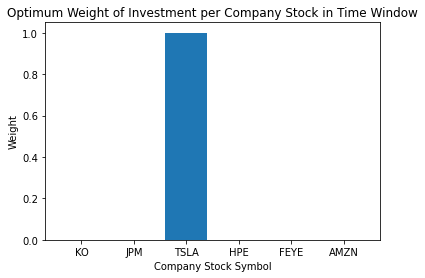

In [924]:
ax = plt.subplot()
plt.bar(range(len(df["Weight"])),df["Weight"]) 
ax.set_xticks(range(len(df["Weight"])))
ax.set_xticklabels(df["Symbol"])
plt.xlabel("Company Stock Symbol")
plt.ylabel("Weight")
plt.title("Optimum Weight of Investment per Company Stock in Time Window")
plt.savefig("CapstoneOpt1_Opt_Weight_Invest_per_Company.png")
plt.show()


Appears to recommend your portfolio has a very large weight (99.99%, nearly 100%) of Tesla and about the same distribution for the other five stocks. Otimized for historical risk and return data. Even though Tesla has the highest volatility, it has the highest return in the optimized portfolio.

In [925]:
print(risks)

[0.056399835474780884, 0.056399835444597105, 0.05639983540946381, 0.05639983536841229, 0.05639983532024494, 0.05639983526347133, 0.05639983519622338, 0.05639983511614179, 0.0563998350202224, 0.056399834904605664, 0.0563998347642837, 0.056399834592686444, 0.05639983438108539, 0.05639983411771758, 0.05639983378646894, 0.05639983336484784, 0.0563998328207885, 0.056399832107481014, 0.056399831154802446, 0.05639982985477936, 0.05639982803638184, 0.05639982542089739, 0.05639982154099379, 0.05639981558753655, 0.05639980608676674, 0.0563997900165357, 0.05639975914759572, 0.056399678891673674, 0.05639934739499471, 0.05639649081250707, 0.055227574447192826, 0.05043822413394666, 0.04628365004021968, 0.04269559694698078, 0.03961459534361273, 0.03698475228020306, 0.03475057841099776, 0.03229508624824458, 0.02998909529015467, 0.0280224543516799, 0.02635596336230656, 0.024953028116774745, 0.023779723549507567, 0.02280475849267172, 0.021999546184196913, 0.02133830011666372, 0.02079807697073218, 0.0203

In [926]:
single_asset_std=np.sqrt(np.diagonal(cov_returns))

In [927]:
single_asset_std

array([0.0220449 , 0.034391  , 0.05639984, 0.0345757 , 0.04456841,
       0.02429615])

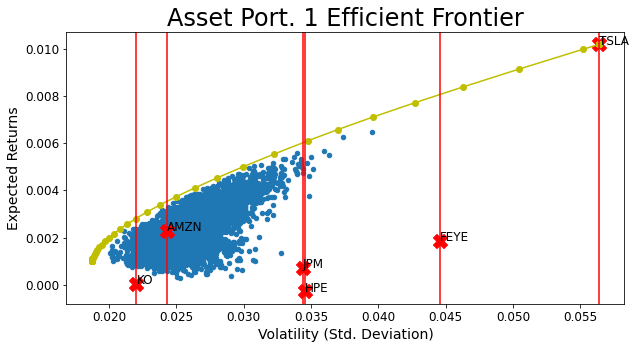

In [928]:
random_portfolios.plot.scatter(x='Volatility', y='Returns', fontsize=12, figsize=(10,5))
try:
    plt.plot(risks, returns, 'y-o')
except:
    pass
plt.scatter(single_asset_std,expected_returns,marker='X',color='red',s=200)
for i, txt in enumerate(symbols):
    plt.annotate(txt, (single_asset_std[i],expected_returns[i]), size=12)
for xc in single_asset_std:
    plt.axvline(x=xc, color='red')
plt.ylabel('Expected Returns',fontsize=14)
plt.xlabel('Volatility (Std. Deviation)',fontsize=14)
plt.title('Asset Port. 1 Efficient Frontier', fontsize=24)
plt.savefig("CapstoneOpt1_EfficientFrontier_withline.png")
plt.show()


Each blue dot shows the wide range of portfolios according to expected returns and volatility. The efficient frontier yellow line is on top of the top-left edge of the portfolio range. This line falls on the portfolios that maximize the expected return at all risks, and minimize the risk at all expected returns.

The vertical red lines in the figure to the right display the standard deviation of each asset. Notice, there are many portfolios (blue dots) with volatility lower than the least volatile asset. This feature results from having multiple, uncorrelated assets in the same portfolio.

In [929]:
expected_returns

Symbols
KO      0.000051
JPM     0.000730
TSLA    0.010178
HPE    -0.000281
FEYE    0.001851
AMZN    0.002294
dtype: float64

Tesla is a risky (high standard dev) stock with a very high expected return. HP is a risky (high standard dev) and negative expected return (-0.000260) asset. 

From lessons but applies to my data too: The vertical red lines in the figure to the right display the standard deviation of each asset. Notice, there are a few portfolios (blue dots) with volatility lower than the least volatile asset. This feature results from having multiple, uncorrelated assets in the same portfolio.

In [930]:
random_portfolios.sort_values(["TSLA Weight"], ascending=False)

,Returns,Volatility,KO Weight,JPM Weight,TSLA Weight,HPE Weight,FEYE Weight,AMZN Weight
186,0.006448,0.039517,0.026494,0.147045,0.579050,0.008886,0.222824,0.015702
4127,0.006259,0.037410,0.022844,0.166686,0.562401,0.060681,0.001722,0.185666
561,0.005493,0.036346,0.072097,0.047434,0.507911,0.189957,0.181267,0.001334
3399,0.005125,0.034069,0.216294,0.077077,0.487714,0.150796,0.045710,0.022410
1863,0.005344,0.032963,0.299106,0.043945,0.485497,0.012222,0.013809,0.145422
...,...,...,...,...,...,...,...,...
660,0.000314,0.025084,0.365950,0.286491,0.000278,0.275798,0.008250,0.063233
824,0.001361,0.023498,0.157877,0.133298,0.000156,0.097592,0.273136,0.337941
0,0.000564,0.026285,0.248392,0.429049,0.000068,0.180079,0.087413,0.055000
828,0.000928,0.021865,0.271489,0.278396,0.000044,0.118534,0.038436,0.293100


Sorting through the random portfolios, it appears that many portoflios with large weights of Tesla have high returns and high volatility.

In [931]:
random_portfolios

,Returns,Volatility,KO Weight,JPM Weight,TSLA Weight,HPE Weight,FEYE Weight,AMZN Weight
0,0.000564,0.026285,0.248392,0.429049,0.000068,0.180079,0.087413,0.055000
1,0.002526,0.025136,0.072424,0.134364,0.154275,0.209508,0.162995,0.266434
2,0.001014,0.025195,0.074173,0.318572,0.009936,0.243239,0.151394,0.202687
3,0.003276,0.027634,0.045093,0.063632,0.257206,0.311014,0.100675,0.222380
4,0.001319,0.021724,0.297781,0.303971,0.028896,0.013270,0.057705,0.298377
...,...,...,...,...,...,...,...,...
4995,0.002329,0.024335,0.378431,0.250629,0.175244,0.032113,0.053373,0.110209
4996,0.001987,0.024757,0.136625,0.244002,0.129245,0.240681,0.041465,0.207982
4997,0.002423,0.024336,0.049154,0.277488,0.128957,0.116717,0.096948,0.330738
4998,0.001962,0.023629,0.322876,0.102364,0.120795,0.123511,0.184901,0.145552


# Second Portfolio
Tesla (TSLA), Hyundai Motor Company (HYMTF), International Busines Machines Corp (IBM), LendingTree (TREE), Docusign (DOCU), Etsy (ETSY)
Chose Hyundai because they had a 15% increase on 12 January 2021. All the other stocks were also on the "gainers" list for Yahoo on 12 January 2021

In [932]:
symbols = ['TSLA','HYMTF','IBM','TREE','DOCU','ETSY']
start_date = datetime(2020, 1, 7)
end_date = datetime(2021, 1, 7)
stock_data = web.get_data_yahoo(symbols, start_date, end_date)

stock_data

Attributes   Adj Close                                                 \
Symbols           TSLA      HYMTF         IBM        TREE        DOCU   
Date                                                                    
2020-01-07   93.811996  31.620001  127.503242  301.200012   75.239998   
2020-01-08   98.428001  31.620001  128.567429  304.320007   76.269997   
2020-01-09   96.267998  30.299999  129.926178  305.640015   75.800003   
2020-01-10   95.629997  33.000000  129.878662  306.000000   74.830002   
2020-01-13  104.972000  33.000000  129.793167  314.019989   74.150002   
...                ...        ...         ...         ...         ...   
2020-12-31  705.669983  43.680000  125.879997  273.790009  222.300003   
2021-01-04  729.770020  44.369999  123.940002  273.600006  222.410004   
2021-01-05  735.109985  44.000000  126.139999  273.779999  228.500000   
2021-01-06  755.979980  43.000000  129.289993  258.209991  223.850006   
2021-01-07  816.039978  42.299999  128.990005  269.040009  239.029999   

Attributes                   Close                                     ...  \
Symbols           ETSY        TSLA      HYMTF         IBM        TREE  ...   
Date                                                                   ...   
2020-01-07   45.779999   93.811996  31.620001  134.190002  301.200012  ...   
2020-01-08   45.005001   98.428001  31.620001  135.309998  304.320007  ...   
2020-01-09   46.430000   96.267998  30.299999  136.740005  305.640015  ...   
2020-01-10   46.130001   95.629997  33.000000  136.690002  306.000000  ...   
2020-01-13   47.959999  104.972000  33.000000  136.600006  314.019989  ...   
...                ...         ...        ...         ...         ...  ...   
2020-12-31  177.910004  705.669983  43.680000  125.879997  273.790009  ...   
2021-01-04  172.080002  729.770020  44.369999  123.940002  273.600006  ...   
2021-01-05  174.979996  735.109985  44.000000  126.139999  273.779999  ...   
2021-01-06  167.570007  755.979980  43.000000  129.289993  258.209991  ...   
2021-01-07  170.789993  816.039978  42.299999  128.990005  269.040009  ...   

Attributes        Open                                           Volume  \
Symbols            IBM        TREE        DOCU        ETSY         TSLA   
Date                                                                      
2020-01-07  133.690002  300.299988   75.669998   45.000000   89410500.0   
2020-01-08  134.509995  301.809998   75.129997   45.840000  155721500.0   
2020-01-09  135.740005  306.790009   76.489998   45.299999  142202000.0   
2020-01-10  137.000000  308.279999   75.550003   46.799999   64797500.0   
2020-01-13  135.479996  307.470001   73.690002   46.279999  132588000.0   
...                ...         ...         ...         ...          ...   
2020-12-31  124.220001  276.109985  225.300003  183.130005   49570900.0   
2021-01-04  125.849998  276.829987  222.389999  179.520004   48638200.0   
2021-01-05  125.010002  271.859985  226.940002  170.190002   32245200.0   
2021-01-06  126.900002  272.720001  222.880005  172.110001   44700000.0   
2021-01-07  130.039993  258.859985  228.539993  170.300003   51498900.0   

Attributes                                                     
Symbols      HYMTF        IBM      TREE       DOCU       ETSY  
Date                                                           
2020-01-07   700.0  3090800.0   92900.0  2289200.0  1945500.0  
2020-01-08     0.0  4346000.0  114200.0  3421300.0  3222700.0  
2020-01-09   200.0  3730600.0  101300.0  1849700.0  2428900.0  
2020-01-10   200.0  3255400.0   85300.0  2317300.0  1979100.0  
2020-01-13     0.0  3531000.0   97800.0  1617100.0  3236300.0  
...            ...        ...       ...        ...        ...  
2020-12-31  3400.0  3574400.0  215800.0  2209100.0  2072700.0  
2021-01-04  4000.0  5179200.0  172300.0  2757700.0  3262000.0  
2021-01-05  4100.0  6114600.0  183700.0  4460900.0  2168200.0  
2021-01-06  2700.0  7956700.0  485000.0  2891800.0  2966000.0  
2

In [933]:
#flatten pivot table to df
stock_data_df = pd.DataFrame(stock_data['Adj Close'].to_records())
stock_data_df.columns = [hdr.replace("('symbols', ", "date.").replace(")", "") \
                     for hdr in stock_data_df.columns]

stock_data_df

,Date,TSLA,HYMTF,IBM,TREE,DOCU,ETSY
0,2020-01-07,93.811996,31.620001,127.503242,301.200012,75.239998,45.779999
1,2020-01-08,98.428001,31.620001,128.567429,304.320007,76.269997,45.005001
2,2020-01-09,96.267998,30.299999,129.926178,305.640015,75.800003,46.430000
3,2020-01-10,95.629997,33.000000,129.878662,306.000000,74.830002,46.130001
4,2020-01-13,104.972000,33.000000,129.793167,314.019989,74.150002,47.959999
...,...,...,...,...,...,...,...
249,2020-12-31,705.669983,43.680000,125.879997,273.790009,222.300003,177.910004
250,2021-01-04,729.770020,44.369999,123.940002,273.600006,222.410004,172.080002
251,2021-01-05,735.109985,44.000000,126.139999,273.779999,228.500000,174.979996
252,2021-01-06,755.979980,43.000000,129.289993,258.209991,223.850006,167.570007


# Plot the Adjusted Closing Price over Time

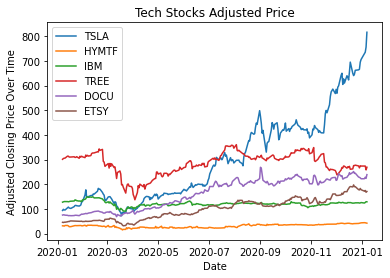

In [934]:
plt.plot(stock_data.index, stock_data["Adj Close"])
plt.xlabel("Date")
plt.ylabel("Adjusted Closing Price Over Time")
plt.title("Tech Stocks Adjusted Price")
plt.legend(symbols)
plt.savefig("Portfolio2/CapstoneOpt2_AdjPrice.png")
plt.show()

# Calculate and plot the daily simple rate of return over time.
* Create a plot with matplotlib that shows the daily simple rate of return for each tech stock over time. Label the graph appropriately. 
* Create subplots for each stock showing daily simple rate of return

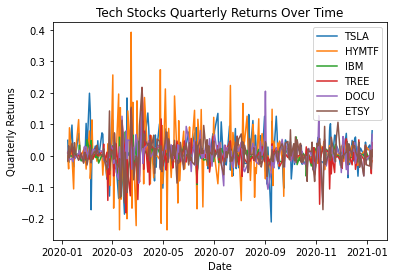

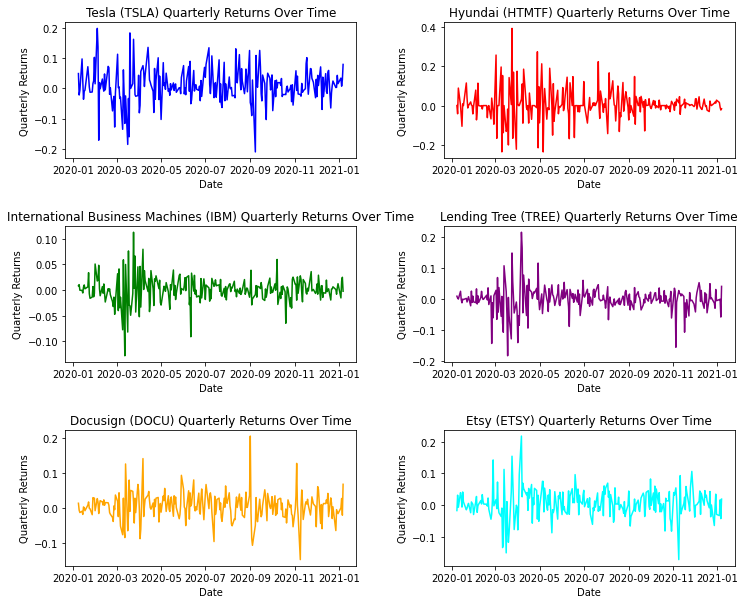

In [935]:
selected=list(stock_data.columns[0:])

returns_quarterly = stock_data[selected].pct_change()

plt.plot(returns_quarterly.index, returns_quarterly["Adj Close"])
plt.xlabel("Date")
plt.ylabel("Quarterly Returns")
plt.title("Tech Stocks Quarterly Returns Over Time")
plt.legend(symbols)
plt.savefig("Portfolio2/CapstoneOpt2_QuarterlyReturns.png")
plt.show()

#'HYMTF','IBM','TREE','DOCU','ETSY'
plt.figure(figsize=(12,10))
ax1=plt.subplot(3, 2, 1)
plt.plot(returns_quarterly.index, returns_quarterly["Adj Close"]["TSLA"], color='blue')
plt.xlabel("Date")
plt.ylabel("Quarterly Returns")
plt.title("Tesla (TSLA) Quarterly Returns Over Time")
ax2=plt.subplot(3, 2, 2)
plt.plot(returns_quarterly.index, returns_quarterly["Adj Close"]["HYMTF"], color='red')
plt.xlabel("Date")
plt.ylabel("Quarterly Returns")
plt.title("Hyundai (HTMTF) Quarterly Returns Over Time")
ax3=plt.subplot(3, 2, 3)
plt.plot(returns_quarterly.index, returns_quarterly["Adj Close"]["IBM"], color='green')
plt.xlabel("Date")
plt.ylabel("Quarterly Returns")
plt.title("International Business Machines (IBM) Quarterly Returns Over Time")
ax4=plt.subplot(3, 2, 4)
ax4.plot(returns_quarterly.index, returns_quarterly["Adj Close"]["TREE"], color='purple')
plt.xlabel("Date")
plt.ylabel("Quarterly Returns")
plt.title("Lending Tree (TREE) Quarterly Returns Over Time")
ax4=plt.subplot(3, 2, 5)
ax4.plot(returns_quarterly.index, returns_quarterly["Adj Close"]["DOCU"], color='orange')
plt.xlabel("Date")
plt.ylabel("Quarterly Returns")
plt.title("Docusign (DOCU) Quarterly Returns Over Time")
ax4=plt.subplot(3, 2, 6)
ax4.plot(returns_quarterly.index, returns_quarterly["Adj Close"]["ETSY"], color='cyan')
plt.xlabel("Date")
plt.ylabel("Quarterly Returns")
plt.title("Etsy (ETSY) Quarterly Returns Over Time")

plt.subplots_adjust(wspace=0.3)
plt.subplots_adjust(hspace=0.5)
plt.savefig("Portfolio2/CapstoneOpt2_SubplotsEachStock_Returns.png")
plt.show()


# Calculate and plot the mean of each tech stock's daily simple rate of return
1) Calculate mean rate of return
    * For each stock, calculate the mean daily simple rate of return.
2) Plot bar chart
    * Use matplotlib to create a bar chart comparing the mean daily simple rate of return for each stock. Label the chart appropriately
3) Analyze mean rate of return
    * Based on the mean rate of return, which stock would be the best option to invest in?

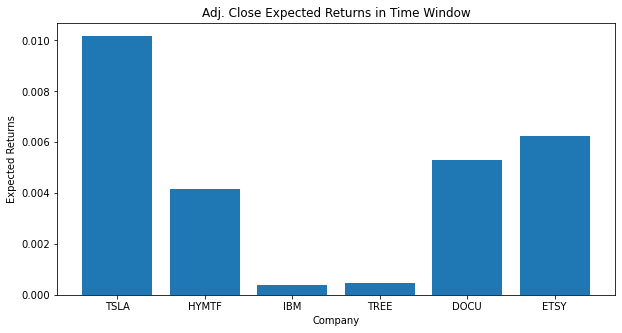

Tesla (TSLA):  0.01017754413026511
Hyundai (HYMTF):  0.004175276478926181
IBM (IBM):  0.0003800409391965949
Lending Tree (TREE):  0.00045091467898267825
Docusign (DOCU):  0.005302162762185875
Etsy (ETSY):  0.006231026984578346


In [936]:
expected_returns = returns_quarterly.mean()

fig, ax = plt.subplots(figsize=(10, 5))
plt.bar(range(len(expected_returns["Adj Close"])),expected_returns["Adj Close"]) 
ax.set_xticks(range(len(expected_returns["Adj Close"])))
ax.set_xticklabels(['TSLA','HYMTF','IBM','TREE','DOCU','ETSY'])
plt.xlabel("Company")
plt.ylabel("Expected Returns")
plt.title("Adj. Close Expected Returns in Time Window")
plt.savefig("Portfolio2/CapstoneOpt2_ExpectedReturns.png")
plt.show()


print("Tesla (TSLA): ", expected_returns["Adj Close"]["TSLA"])
print("Hyundai (HYMTF): ", expected_returns["Adj Close"]["HYMTF"])
print("IBM (IBM): ", expected_returns["Adj Close"]["IBM"])
print("Lending Tree (TREE): ", expected_returns["Adj Close"]["TREE"])
print("Docusign (DOCU): ", expected_returns["Adj Close"]["DOCU"])
print("Etsy (ETSY): ", expected_returns["Adj Close"]["ETSY"])

# Calculate and plot the variance.
1) Calculate the variance
    * For each stock, calculate the variance of the mean daily simple rate of return.
2) Plot bar chart
    * Use matplotlib to create a bar chart comparing the variance for each stock. Label the chart appropriately
3) Analyse the variance
    * Based on the variance, which stock would be the riskiest to invest in?

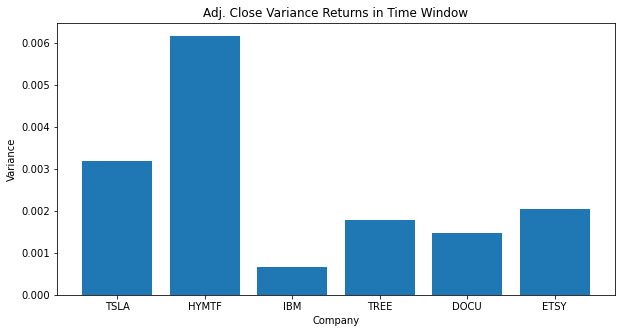

Tesla (TSLA):  0.003180941937134724
Hyundai (HYMTF):  0.006171959330352365
IBM (IBM):  0.0006665606119216555
Lending Tree (TREE):  0.0017852312468109974
Docusign (DOCU):  0.0014672955534048282
Etsy (ETSY):  0.0020374720772546955


In [937]:
returns_var = returns_quarterly.var()

returns_var

fig, ax = plt.subplots(figsize=(10, 5))
plt.bar(range(len(returns_var["Adj Close"])),returns_var["Adj Close"]) 
ax.set_xticks(range(len(returns_var["Adj Close"])))
ax.set_xticklabels(['TSLA','HYMTF','IBM','TREE','DOCU','ETSY'])
plt.xlabel("Company")
plt.ylabel("Variance")
plt.title("Adj. Close Variance Returns in Time Window")
plt.savefig("Portfolio2/CapstoneOpt2_VarianceReturns.png")
plt.show()

print("Tesla (TSLA): ", returns_var["Adj Close"]["TSLA"])
print("Hyundai (HYMTF): ", returns_var["Adj Close"]["HYMTF"])
print("IBM (IBM): ", returns_var["Adj Close"]["IBM"])
print("Lending Tree (TREE): ", returns_var["Adj Close"]["TREE"])
print("Docusign (DOCU): ", returns_var["Adj Close"]["DOCU"])
print("Etsy (ETSY): ", returns_var["Adj Close"]["ETSY"])

IBM shows the highest variance from 1 January 2020 to 1 January 2021 indicating it could be a riskier investment. The company with the second highest variance is Hyundai and third is Tesla. While Lending Tree shows the least variance indicating it could be the least risky investment out of the six. 

# Calculate and plot the standard deviation

1) Calculate the standard deviation
    * For each stock, calculate the standard deviation of the mean daily simple rate of return.

2) Plot the bar chart
    * Use matplotlib to create a bar chart comparing the standard deviation of the mean daily simple rate of return of each stock. Label the chart appropriately

3) Analyze the standard deviation
    * Based on the standard deviation of the rates of return, which stock would you choose to invest in and why?


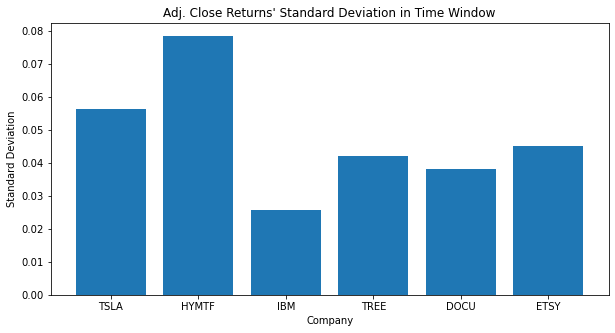

Tesla (TSLA):  0.05639983986798831
Hyundai (HYMTF):  0.07856181852752878
IBM (IBM):  0.02581783515172516
Lending Tree (TREE):  0.042251996956487126
Docusign (DOCU):  0.038305294064983085
Etsy (ETSY):  0.04513836591254379


In [938]:
std_returns = returns_quarterly.std()

fig, ax = plt.subplots(figsize=(10, 5))
plt.bar(range(len(std_returns["Adj Close"])),std_returns["Adj Close"]) 
ax.set_xticks(range(len(std_returns["Adj Close"])))
ax.set_xticklabels(['TSLA','HYMTF','IBM','TREE','DOCU','ETSY'])
plt.xlabel("Company")
plt.ylabel("Standard Deviation")
plt.title("Adj. Close Returns' Standard Deviation in Time Window")
plt.savefig("Portfolio2/CapstoneOpt2_Returns_Stdv.png")
plt.show()


print("Tesla (TSLA): ", std_returns["Adj Close"]["TSLA"])
print("Hyundai (HYMTF): ", std_returns["Adj Close"]["HYMTF"])
print("IBM (IBM): ", std_returns["Adj Close"]["IBM"])
print("Lending Tree (TREE): ", std_returns["Adj Close"]["TREE"])
print("Docusign (DOCU): ", std_returns["Adj Close"]["DOCU"])
print("Etsy (ETSY): ", std_returns["Adj Close"]["ETSY"])

The most volatile stock is Hyundai. Tesla is the most volatile stock but it also is the second most in mean return. This means that the the stock on average is making more money than the others though it is prone to dramatic dips and increases. The least volatile stock is IBM.

# Calculate the correlations
Calculate the correlations between each of the stocks. Which stocks are positively correlated? Which are negatively correlated? Which have little correlation?


In [939]:
cov_returns = returns_quarterly["Adj Close"].cov()

cov_returns

Symbols,TSLA,HYMTF,IBM,TREE,DOCU,ETSY
Symbols,,,,,,
TSLA,0.003181,0.000504,0.000438,0.000700,0.000639,0.000742
HYMTF,0.000504,0.006172,0.000363,0.000401,-0.000055,0.000238
IBM,0.000438,0.000363,0.000667,0.000472,0.000164,0.000377
TREE,0.000700,0.000401,0.000472,0.001785,0.000277,0.000601
DOCU,0.000639,-0.000055,0.000164,0.000277,0.001467,0.000874
ETSY,0.000742,0.000238,0.000377,0.000601,0.000874,0.002037


Conclusions so far

All except Hyundai and Docusign are correlated to a positive degree. Hyundai and Docusign are negatively correlated meaning that when one stock increases the other decreases. The stocks with the highest correlation are Etsy and Docusign. Tesla and Etsy are the second highest and Tesla and Lending Tree are third. 

Docusign is in an industry that one would think grew a lot during the past year with more signatures and documents being exchanged online. Similarly, new businesses of all sorts probably emerged on Etsy thus postively effecting their stock.

This portfolio already seems stronger than my first portfolio because there are other stocks besides Tesla which did quite well over the last year.

The strong positive correlation between many of the stocks could be worrisome in the future because if one decreases they all will likely decrease. There could be risk. 

Each of the stocks plummeted in March 2020 as a likely outcome from the news of the pandemic. Each came back to its norm a month or two later while Tesla, Etsy, and Docusign rose.


# Portfolio Optimization

   Returns  Volatility  TSLA Weight  HYMTF Weight  IBM Weight  TREE Weight  \
0   0.0052      0.0415       0.2484        0.4290      0.0001       0.1801   
1   0.0040      0.0278       0.0724        0.1344      0.1543       0.2095   
2   0.0043      0.0344       0.0742        0.3186      0.0099       0.2432   
3   0.0029      0.0268       0.0451        0.0636      0.2572       0.3110   
4   0.0065      0.0373       0.2978        0.3040      0.0289       0.0133   

   DOCU Weight  ETSY Weight  
0       0.0874       0.0550  
1       0.1630       0.2664  
2       0.1514       0.2027  
3       0.1007       0.2224  
4       0.0577       0.2984  


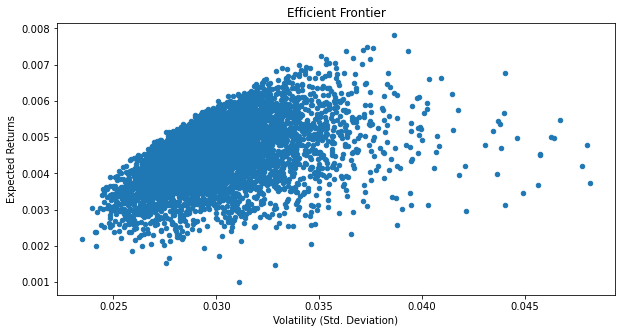

In [940]:
expected_returns = returns_quarterly['Adj Close'].mean()

cov_returns = returns_quarterly['Adj Close'].cov()

# had to adjust this function from the class lesson as "can only concatenate tuple (not str) to tuple"
def return_portfolios(expected_returns, cov_matrix):
    np.random.seed(1)
    port_returns = []
    port_volatility = []
    stock_weights = []
    
    selected = (expected_returns.axes)[0]
    
    num_assets = len(selected) 
    num_portfolios = 5000
    
    for single_portfolio in range(num_portfolios):
        weights = np.random.random(num_assets)
        weights /= np.sum(weights)
        returns = np.dot(weights, expected_returns)
        volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
        port_returns.append(returns)
        port_volatility.append(volatility)
        stock_weights.append(weights)
    
    portfolio = {'Returns': port_returns,
                 'Volatility': port_volatility}
    for counter,symbol in enumerate(selected):
        portfolio[f"{symbol} Weight"] = [Weight[counter] for Weight in stock_weights]
    
    df = pd.DataFrame(portfolio)
    
    column_order = ['Returns', 'Volatility'] + [f"{stock} Weight" for stock in selected]
    
    df = df[column_order]
   
    return df

random_portfolios = return_portfolios(expected_returns, cov_returns) 
print(random_portfolios.head().round(4))

random_portfolios.plot.scatter(x='Volatility', y='Returns', figsize=(10,5))
plt.title("Efficient Frontier")
plt.xlabel("Volatility (Std. Deviation)")
plt.ylabel("Expected Returns")
plt.savefig("Portfolio2/CapstoneOpt2_EfficientFrontier_nooptimumline.png")
plt.show()

In [941]:
returns_quarterly = returns_quarterly['Adj Close']

n = returns_quarterly.shape[1]
n

6

In [942]:
#to_matrix() was deprecated so I replaced with ".values"
def optimal_portfolio(returns):
    n = returns.shape[1]
    returns = np.transpose(returns.values)

    N = 100
    mus = [10**(5.0 * t/N - 1.0) for t in range(N)]

    # Convert to cvxopt matrices
    S = opt.matrix(np.cov(returns))
    pbar = opt.matrix(np.mean(returns, axis=1))

    # Create constraint matrices
    G = -opt.matrix(np.eye(n))   # negative n x n identity matrix
    h = opt.matrix(0.0, (n ,1))
    A = opt.matrix(1.0, (1, n))
    b = opt.matrix(1.0)

    # Calculate efficient frontier weights using quadratic programming
    portfolios = [solvers.qp(mu*S, -pbar, G, h, A, b)['x']
                  for mu in mus]
    ## CALCULATE RISKS AND RETURNS FOR FRONTIER
    returns = [blas.dot(pbar, x) for x in portfolios]
    risks = [np.sqrt(blas.dot(x, S*x)) for x in portfolios]
    ## CALCULATE THE 2ND DEGREE POLYNOMIAL OF THE FRONTIER CURVE
    m1 = np.polyfit(returns, risks, 2)
    x1 = np.sqrt(m1[2] / m1[0])
    # CALCULATE THE OPTIMAL PORTFOLIO
    wt = solvers.qp(opt.matrix(x1 * S), -pbar, G, h, A, b)['x']
    return np.asarray(wt), returns, risks

In [943]:
weights, returns, risks = optimal_portfolio(returns_quarterly[1:])

     pcost       dcost       gap    pres   dres
 0: -4.4816e-03 -1.0101e+00  1e+00  2e-16  3e+00
 1: -4.5041e-03 -2.0112e-02  2e-02  2e-16  4e-02
 2: -5.7819e-03 -1.0184e-02  4e-03  8e-17  1e-02
 3: -9.7586e-03 -1.1098e-02  1e-03  2e-15  6e-05
 4: -1.0011e-02 -1.0029e-02  2e-05  1e-16  7e-07
 5: -1.0018e-02 -1.0019e-02  2e-07  3e-16  7e-09
 6: -1.0018e-02 -1.0018e-02  2e-09  1e-16  7e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -4.4766e-03 -1.0101e+00  1e+00  2e-16  3e+00
 1: -4.4992e-03 -2.0105e-02  2e-02  7e-17  4e-02
 2: -5.7751e-03 -1.0172e-02  4e-03  9e-17  1e-02
 3: -9.7445e-03 -1.1075e-02  1e-03  1e-16  3e-05
 4: -9.9920e-03 -1.0010e-02  2e-05  2e-16  4e-07
 5: -9.9990e-03 -9.9992e-03  2e-07  1e-16  4e-09
 6: -9.9991e-03 -9.9991e-03  2e-09  2e-16  4e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -4.4711e-03 -1.0101e+00  1e+00  2e-16  3e+00
 1: -4.4936e-03 -2.0096e-02  2e-02  1e-16  4e-02
 2: -5.7675e-03 -1.0160e

 5: -8.7597e-03 -8.7601e-03  5e-07  6e-19  3e-18
 6: -8.7600e-03 -8.7600e-03  5e-09  2e-16  3e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -4.1168e-03 -1.0095e+00  1e+00  0e+00  3e+00
 1: -4.1377e-03 -1.9527e-02  2e-02  1e-16  4e-02
 2: -5.2893e-03 -9.3564e-03  4e-03  6e-17  1e-02
 3: -8.1282e-03 -9.3997e-03  1e-03  4e-16  2e-18
 4: -8.5430e-03 -8.5954e-03  5e-05  1e-16  3e-18
 5: -8.5866e-03 -8.5872e-03  6e-07  1e-16  3e-18
 6: -8.5871e-03 -8.5871e-03  6e-09  1e-16  2e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -4.0674e-03 -1.0095e+00  1e+00  2e-16  3e+00
 1: -4.0881e-03 -1.9448e-02  2e-02  5e-17  4e-02
 2: -5.2237e-03 -9.2465e-03  4e-03  7e-17  1e-02
 3: -7.9271e-03 -9.1844e-03  1e-03  6e-16  6e-18
 4: -8.3403e-03 -8.4017e-03  6e-05  1e-16  2e-18
 5: -8.3922e-03 -8.3931e-03  8e-07  1e-16  4e-18
 6: -8.3930e-03 -8.3930e-03  8e-09  2e-16  2e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres


 5: -2.0399e-03 -2.0402e-03  4e-07  1e-16  2e-18
 6: -2.0400e-03 -2.0400e-03  4e-09  1e-16  2e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -5.1150e-04 -1.0037e+00  1e+00  2e-16  3e+00
 1: -5.2901e-04 -1.3694e-02  1e-02  6e-17  4e-02
 2: -1.0814e-03 -2.7341e-03  2e-03  4e-17  4e-03
 3: -1.4437e-03 -1.6491e-03  2e-04  2e-16  1e-18
 4: -1.4960e-03 -1.5087e-03  1e-05  2e-16  2e-18
 5: -1.5042e-03 -1.5044e-03  2e-07  2e-16  2e-18
 6: -1.5043e-03 -1.5043e-03  2e-09  2e-16  8e-19
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -2.8344e-05 -1.0034e+00  1e+00  0e+00  3e+00
 1: -4.7097e-05 -1.3344e-02  1e-02  2e-16  4e-02
 2: -5.7837e-04 -2.3208e-03  2e-03  1e-16  4e-03
 3: -8.9976e-04 -1.0824e-03  2e-04  7e-17  2e-18
 4: -9.5558e-04 -9.6416e-04  9e-06  9e-17  2e-18
 5: -9.6233e-04 -9.6246e-04  1e-07  1e-16  1e-18
 6: -9.6244e-04 -9.6244e-04  1e-09  1e-16  3e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres


 4:  2.3308e-02  2.3259e-02  5e-05  1e-16  3e-17
 5:  2.3303e-02  2.3300e-02  3e-06  2e-16  2e-17
 6:  2.3303e-02  2.3303e-02  6e-08  1e-16  8e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  3.6748e-02 -9.9439e-01  1e+00  0e+00  3e+00
 1:  3.5868e-02 -3.2216e-03  4e-02  8e-17  1e-01
 2:  2.7670e-02  1.8891e-02  9e-03  2e-16  4e-17
 3:  2.6553e-02  2.5763e-02  8e-04  2e-16  2e-17
 4:  2.6428e-02  2.6372e-02  6e-05  2e-16  2e-17
 5:  2.6420e-02  2.6417e-02  4e-06  2e-16  1e-17
 6:  2.6420e-02  2.6420e-02  1e-07  2e-16  1e-17
 7:  2.6420e-02  2.6420e-02  1e-09  2e-16  7e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  4.1385e-02 -9.9317e-01  1e+00  2e-16  3e+00
 1:  4.0323e-02 -1.7521e-03  4e-02  7e-17  1e-01
 2:  3.1272e-02  2.1630e-02  1e-02  1e-16  2e-17
 3:  3.0065e-02  2.9212e-02  9e-04  2e-16  3e-17
 4:  2.9922e-02  2.9859e-02  6e-05  3e-16  1e-17
 5:  2.9913e-02  2.9908e-02  4e-06  1e-16  2e-17
 6:  2.9912e-02  2.9912

     pcost       dcost       gap    pres   dres
 0:  2.5873e-01 -8.6488e-01  1e+00  3e-16  3e+00
 1:  2.4606e-01  1.5150e-01  9e-02  6e-17  3e-01
 2:  2.2692e-01  2.1582e-01  1e-02  1e-16  2e-03
 3:  2.2446e-01  2.2352e-01  9e-04  6e-17  3e-06
 4:  2.2414e-01  2.2403e-01  1e-04  2e-16  4e-08
 5:  2.2409e-01  2.2407e-01  1e-05  1e-16  7e-17
 6:  2.2408e-01  2.2408e-01  7e-07  1e-16  8e-17
 7:  2.2408e-01  2.2408e-01  1e-08  1e-16  5e-17
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  2.8695e-01 -8.4203e-01  1e+00  1e-16  3e+00
 1:  2.7314e-01  1.7811e-01  1e-01  6e-17  3e-01
 2:  2.5445e-01  2.4365e-01  1e-02  4e-17  3e-03
 3:  2.5203e-01  2.5114e-01  9e-04  6e-17  1e-16
 4:  2.5171e-01  2.5161e-01  1e-04  4e-18  2e-16
 5:  2.5166e-01  2.5164e-01  1e-05  1e-16  2e-16
 6:  2.5165e-01  2.5165e-01  7e-07  1e-16  1e-16
 7:  2.5165e-01  2.5165e-01  2e-08  1e-16  1e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  3.1833e-01 -8.1573e

In [944]:
print(weights)

symbols

[[9.99999886e-01]
 [3.04966562e-08]
 [2.28038692e-08]
 [2.29417178e-08]
 [2.71623151e-08]
 [1.03714797e-08]]


['TSLA', 'HYMTF', 'IBM', 'TREE', 'DOCU', 'ETSY']

In [945]:
companies = ["Tesla", "Hyundai", "IBM", "Lending Tree", "Docusign", "Etsy"]

d = {'Company':companies, 'Symbol':symbols, 'Weight':[item for sublist in weights for item in sublist], 'Perc_Weight':["{:.1%}".format(item) for sublist in weights for item in sublist]}

d

{'Company': ['Tesla', 'Hyundai', 'IBM', 'Lending Tree', 'Docusign', 'Etsy'],
 'Symbol': ['TSLA', 'HYMTF', 'IBM', 'TREE', 'DOCU', 'ETSY'],
 'Weight': [0.9999998862239619,
  3.0496656220988045e-08,
  2.2803869178529106e-08,
  2.2941717846944274e-08,
  2.7162315143306665e-08,
  1.0371479747428991e-08],
 'Perc_Weight': ['100.0%', '0.0%', '0.0%', '0.0%', '0.0%', '0.0%']}

In [946]:
df = pd.DataFrame(d, columns=['Company','Symbol', 'Weight', 'Perc_Weight'])

df

,Company,Symbol,Weight,Perc_Weight
0,Tesla,TSLA,9.999999e-01,100.0%
1,Hyundai,HYMTF,3.049666e-08,0.0%
2,IBM,IBM,2.280387e-08,0.0%
3,Lending Tree,TREE,2.294172e-08,0.0%
4,Docusign,DOCU,2.716232e-08,0.0%
5,Etsy,ETSY,1.037148e-08,0.0%


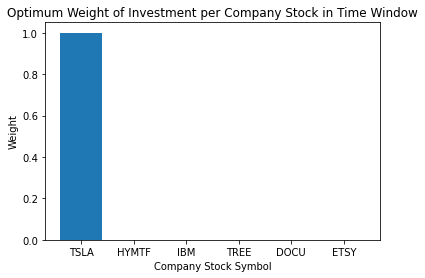

In [947]:
ax = plt.subplot()
plt.bar(range(len(df["Weight"])),df["Weight"]) 
ax.set_xticks(range(len(df["Weight"])))
ax.set_xticklabels(df["Symbol"])
plt.xlabel("Company Stock Symbol")
plt.ylabel("Weight")
plt.title("Optimum Weight of Investment per Company Stock in Time Window")
plt.savefig("Portfolio2/CapstoneOpt2_Opt_Weight_Invest_per_Company.png")
plt.show()

Appears to recommend your portfolio has a very large weight (99.99%, nearly 100%) of Tesla and about the same distribution for the other five stocks. Otimized for historical risk and return data. Even though Tesla has the highest volatility, it has the highest return in the optimized portfolio.

In [948]:
print(risks)

single_asset_std=np.sqrt(np.diagonal(cov_returns))

single_asset_std

[0.05639983493633353, 0.056399834988069976, 0.05639983504954884, 0.056399834819581066, 0.05639983448882001, 0.05639983409344164, 0.05639983361815721, 0.05639983304321054, 0.05639983234272909, 0.056399831482306956, 0.05639983041538912, 0.05639982907774821, 0.05639982737886769, 0.05639982518819838, 0.05639982231266822, 0.05639981845853941, 0.05639981316265842, 0.05639980565344559, 0.056399794507319065, 0.056399776536843936, 0.056399742170417586, 0.05639965284345107, 0.056399320802962984, 0.05639729987943467, 0.056389848489786266, 0.053914943937095935, 0.05133797566433617, 0.04919167708170842, 0.04741456028814034, 0.045185281087440396, 0.04296936412445525, 0.0409006490260144, 0.03917992808431768, 0.037755735281085834, 0.0365848842966427, 0.035627416980566894, 0.034848123700448874, 0.03421643539329607, 0.03370396053123526, 0.032291439282500896, 0.030560095034728965, 0.02911148074415745, 0.02790726375008614, 0.026912338315549292, 0.026095010797482724, 0.02542701453509693, 0.0248827567434797

array([0.05639984, 0.07856182, 0.02581784, 0.042252  , 0.03830529,
       0.04513837])

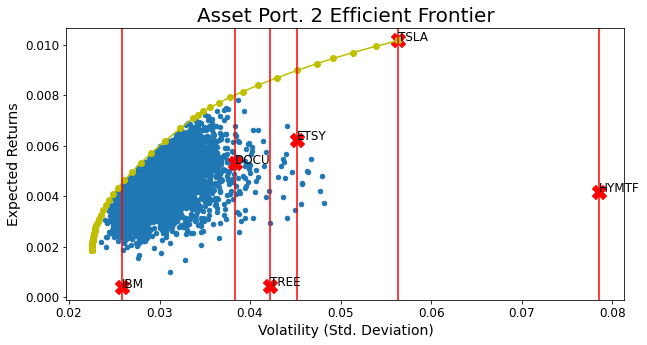

In [949]:
random_portfolios.plot.scatter(x='Volatility', y='Returns', fontsize=12, figsize=(10,5))
try:
    plt.plot(risks, returns, 'y-o')
except:
    pass
plt.scatter(single_asset_std,expected_returns,marker='X',color='red',s=200)
for i, txt in enumerate(symbols):
    plt.annotate(txt, (single_asset_std[i],expected_returns[i]), size=12)
for xc in single_asset_std:
    plt.axvline(x=xc, color='red')
plt.ylabel('Expected Returns',fontsize=14)
plt.xlabel('Volatility (Std. Deviation)',fontsize=14)
plt.title('Asset Port. 2 Efficient Frontier', fontsize=20)
plt.savefig("Portfolio2/CapstoneOpt2_EfficientFrontier_withline.png")
plt.show()

The vertical red lines in the figure to the right display the standard deviation of each asset. Notice, there are many portfolios (blue dots) with volatility lower than the least volatile asset. This feature results from having multiple, uncorrelated assets in the same portfolio.

An important feature that results from this is that increasing the number of uncorrelated assets will decrease or not affect the risk of the portfolio.

In [950]:
random_portfolios.sort_values(["Returns"], ascending=False)

,Returns,Volatility,TSLA Weight,HYMTF Weight,IBM Weight,TREE Weight,DOCU Weight,ETSY Weight
2765,0.007806,0.038632,0.565125,0.084928,0.045577,0.006516,0.189641,0.108213
4901,0.007479,0.037332,0.501380,0.089163,0.021942,0.058279,0.088694,0.240541
2806,0.007461,0.037607,0.533888,0.025014,0.037144,0.069615,0.221595,0.112743
4096,0.007402,0.037147,0.492516,0.004345,0.056707,0.053870,0.129794,0.262769
3684,0.007377,0.036324,0.436257,0.024695,0.013963,0.052738,0.148714,0.323632
...,...,...,...,...,...,...,...,...
546,0.001727,0.030124,0.077425,0.017526,0.264464,0.549513,0.053549,0.037524
3136,0.001662,0.027701,0.023004,0.030671,0.355550,0.430018,0.033682,0.127075
1284,0.001528,0.027578,0.050784,0.098574,0.391946,0.409746,0.042357,0.006593
3925,0.001481,0.032838,0.060562,0.038167,0.192572,0.653434,0.007693,0.047571


# Portfolio 3
Brand new stock portfolio
Uber (UBER), Under Armour (UAA), EBAY (EBAY), Intel Corp (INTC), ViacomCBS (VIAC), Lyft (LYFT)

In [951]:
symbols = ['UBER','UAA','EBAY','INTC','VIAC','LYFT']
start_date = datetime(2020, 1, 7)
end_date = datetime(2021, 1, 7)
stock_data = web.get_data_yahoo(symbols, start_date, end_date)

stock_data

Attributes  Adj Close                                                         \
Symbols          UBER        UAA       EBAY       INTC       VIAC       LYFT   
Date                                                                           
2020-01-07  32.810001  20.700001  35.115150  57.500240  40.469872  44.250000   
2020-01-08  33.930000  20.420000  35.095432  57.539272  40.220116  45.080002   
2020-01-09  33.970001  19.790001  34.681389  57.861263  39.201889  45.590000   
2020-01-10  34.009998  19.770000  34.395496  57.509998  38.721588  46.060001   
2020-01-13  34.139999  20.170000  34.237762  58.144230  39.192280  46.349998   
...               ...        ...        ...        ...        ...        ...   
2020-12-31  51.000000  17.170000  50.250000  49.820000  37.259998  49.130001   
2021-01-04  51.139999  17.350000  51.500000  49.669998  36.599998  47.279999   
2021-01-05  54.009998  17.850000  52.029999  50.610001  36.990002  48.849998   
2021-01-06  52.480000  17.969999  53.220001  51.099998  40.200001  47.459999   
2021-01-07  56.130001  18.030001  53.060001  52.189999  40.119999  48.840000   

Attributes      Close                                   ...       Open  \
Symbols          UBER        UAA       EBAY       INTC  ...       EBAY   
Date                                                    ...              
2020-01-07  32.810001  20.700001  35.619999  58.930000  ...  35.669998   
2020-01-08  33.930000  20.420000  35.599998  58.970001  ...  35.709999   
2020-01-09  33.970001  19.790001  35.180000  59.299999  ...  35.139999   
2020-01-10  34.009998  19.770000  34.889999  58.939999  ...  35.209999   
2020-01-13  34.139999  20.170000  34.730000  59.590000  ...  34.849998   
...               ...        ...        ...        ...  ...        ...   
2020-12-31  51.000000  17.170000  50.250000  49.820000  ...  50.610001   
2021-01-04  51.139999  17.350000  51.500000  49.669998  ...  50.480000   
2021-01-05  54.009998  17.850000  52.029999  50.610001  ...  51.349998   
2021-01-06  52.480000  17.969999  53.220001  51.099998  ...  51.500000   
2021-01-07  56.130001  18.030001  53.060001  52.189999  ...  53.419998   

Attributes                                       Volume             \
Symbols          INTC       VIAC       LYFT        UBER        UAA   
Date                                                                 
2020-01-07  59.779999  41.880001  43.180000  30119600.0  6638200.0   
2020-01-08  58.889999  42.200001  44.139999  43944400.0  4366300.0   
2020-01-09  59.049999  42.230000  45.160000  29385500.0  5836900.0   
2020-01-10  59.570000  40.900002  45.590000  34266400.0  3522400.0   
2020-01-13  59.169998  40.400002  46.310001  16915800.0  3005000.0   
...               ...        ...        ...         ...        ...   
2020-12-31  48.750000  36.750000  50.259998  13270700.0  3205000.0   
2021-01-04  49.889999  37.299999  49.380001  17291800.0  4891700.0   
2021-01-05  49.450001  36.639999  47.020000  21403200.0  4977400.0   
2021-01-06  50.439999  37.849998  48.980000  17738100.0  4524000.0   
2021-01-07  51.490002  39.990002  48.090000  23737500.0  5284300.0   

Attributes                                                 
Symbols           EBAY        INTC        VIAC       LYFT  
Date                                                       
2020-01-07   6867400.0  21876100.0   5104000.0  4773500.0  
2020-01-08   6072600.0  23133500.0   8139300.0  5636300.0  
2020-01-09  10787300.0  18813300.0   7749200.0  4640800.0  
2020-01-10   5664400.0  15200600.0   4688100.0  4512000.0  
2020-01-13   7987600.0  16453300.0   5809600.0  3796300.0  
...                ...         ...         ...        ...  
2020-12-31   3597200.0  28565500.0   7666500.0  3222800.0  
2021-01-04   7843500.0  46102500.0  12491900.0  6214700.0  
2021-01-05  10002400.0  24866600.0  13060300.0  5338100.0  
2021-01-06   9911400.0  36809600.0  20360700.0  7678800.0  
2021-01-07   7348800.0  32092300.0  13123600.0  6651100.0  

[254 rows x 36 colum

In [952]:
#flatten pivot table to df
stock_data_df = pd.DataFrame(stock_data['Adj Close'].to_records())
stock_data_df.columns = [hdr.replace("('symbols', ", "date.").replace(")", "") \
                     for hdr in stock_data_df.columns]

stock_data_df

,Date,UBER,UAA,EBAY,INTC,VIAC,LYFT
0,2020-01-07,32.810001,20.700001,35.115150,57.500240,40.469872,44.250000
1,2020-01-08,33.930000,20.420000,35.095432,57.539272,40.220116,45.080002
2,2020-01-09,33.970001,19.790001,34.681389,57.861263,39.201889,45.590000
3,2020-01-10,34.009998,19.770000,34.395496,57.509998,38.721588,46.060001
4,2020-01-13,34.139999,20.170000,34.237762,58.144230,39.192280,46.349998
...,...,...,...,...,...,...,...
249,2020-12-31,51.000000,17.170000,50.250000,49.820000,37.259998,49.130001
250,2021-01-04,51.139999,17.350000,51.500000,49.669998,36.599998,47.279999
251,2021-01-05,54.009998,17.850000,52.029999,50.610001,36.990002,48.849998
252,2021-01-06,52.480000,17.969999,53.220001,51.099998,40.200001,47.459999


# Plot the Adjusted Closing Price over Time

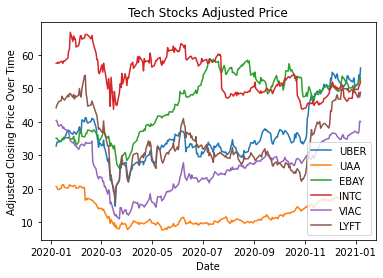

In [953]:
plt.plot(stock_data.index, stock_data["Adj Close"])
plt.xlabel("Date")
plt.ylabel("Adjusted Closing Price Over Time")
plt.title("Tech Stocks Adjusted Price")
plt.legend(symbols)
plt.savefig("Portfolio3/CapstoneOpt3_AdjPrice.png")
plt.show()

# Calculate and plot the daily simple rate of return over time.
* Create a plot with matplotlib that shows the daily simple rate of return for each tech stock over time. Label the graph appropriately. 
* Create subplots for each stock showing daily simple rate of return

In [954]:
symbols

['UBER', 'UAA', 'EBAY', 'INTC', 'VIAC', 'LYFT']

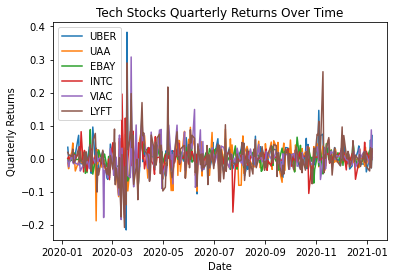

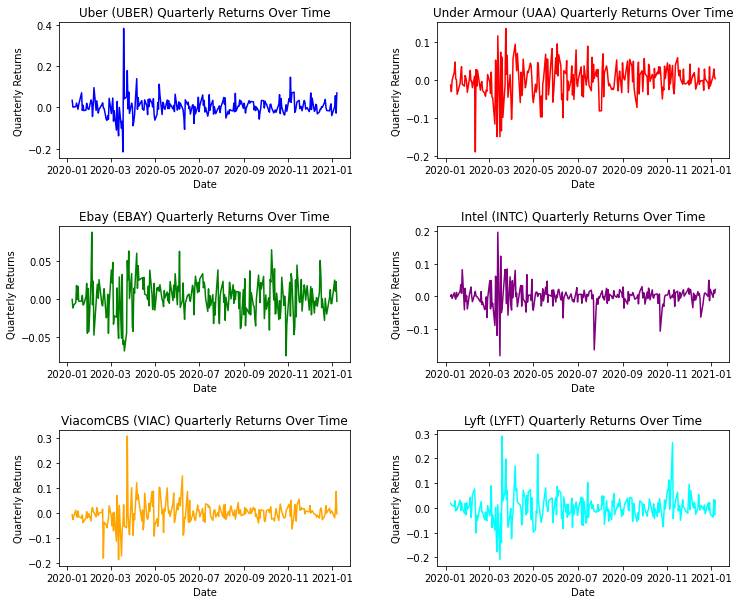

In [955]:
selected=list(stock_data.columns[0:])

returns_quarterly = stock_data[selected].pct_change()

plt.plot(returns_quarterly.index, returns_quarterly["Adj Close"])
plt.xlabel("Date")
plt.ylabel("Quarterly Returns")
plt.title("Tech Stocks Quarterly Returns Over Time")
plt.legend(symbols)
plt.savefig("Portfolio3/CapstoneOpt3_QuarterlyReturns.png")
plt.show()

plt.figure(figsize=(12,10))
ax1=plt.subplot(3, 2, 1)
plt.plot(returns_quarterly.index, returns_quarterly["Adj Close"]["UBER"], color='blue')
plt.xlabel("Date")
plt.ylabel("Quarterly Returns")
plt.title("Uber (UBER) Quarterly Returns Over Time")
ax2=plt.subplot(3, 2, 2)
plt.plot(returns_quarterly.index, returns_quarterly["Adj Close"]["UAA"], color='red')
plt.xlabel("Date")
plt.ylabel("Quarterly Returns")
plt.title("Under Armour (UAA) Quarterly Returns Over Time")
ax3=plt.subplot(3, 2, 3)
plt.plot(returns_quarterly.index, returns_quarterly["Adj Close"]["EBAY"], color='green')
plt.xlabel("Date")
plt.ylabel("Quarterly Returns")
plt.title("Ebay (EBAY) Quarterly Returns Over Time")
ax4=plt.subplot(3, 2, 4)
ax4.plot(returns_quarterly.index, returns_quarterly["Adj Close"]["INTC"], color='purple')
plt.xlabel("Date")
plt.ylabel("Quarterly Returns")
plt.title("Intel (INTC) Quarterly Returns Over Time")
ax4=plt.subplot(3, 2, 5)
ax4.plot(returns_quarterly.index, returns_quarterly["Adj Close"]["VIAC"], color='orange')
plt.xlabel("Date")
plt.ylabel("Quarterly Returns")
plt.title("ViacomCBS (VIAC) Quarterly Returns Over Time")
ax4=plt.subplot(3, 2, 6)
ax4.plot(returns_quarterly.index, returns_quarterly["Adj Close"]["LYFT"], color='cyan')
plt.xlabel("Date")
plt.ylabel("Quarterly Returns")
plt.title("Lyft (LYFT) Quarterly Returns Over Time")

plt.subplots_adjust(wspace=0.3)
plt.subplots_adjust(hspace=0.5)
plt.savefig("Portfolio3/CapstoneOpt3_SubplotsEachStock_Returns.png")
plt.show()


# Calculate and plot the mean of each tech stock's daily simple rate of return
1) Calculate mean rate of return
    * For each stock, calculate the mean daily simple rate of return.
2) Plot bar chart
    * Use matplotlib to create a bar chart comparing the mean daily simple rate of return for each stock. Label the chart appropriately
3) Analyze mean rate of return
    * Based on the mean rate of return, which stock would be the best option to invest in?

In [956]:
symbols

['UBER', 'UAA', 'EBAY', 'INTC', 'VIAC', 'LYFT']

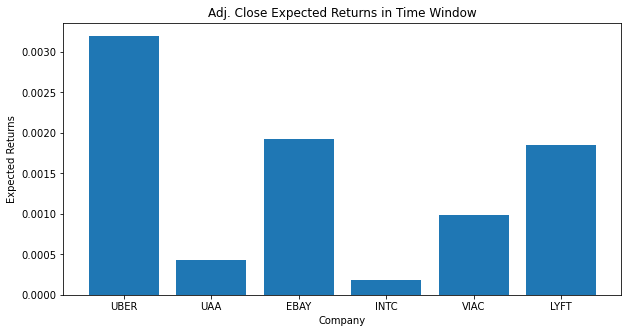

Uber (UBER):  0.0031977529387900022
Under Armour (UAA):  0.00042381229743811534
Ebay (EBAY):  0.0019224571637881755
Intel Corp (INTC):  0.0001878382957365873
ViacomCBS (VIAC):  0.0009813231558302323
Lyft (LYFT):  0.0018550625406264258


In [957]:
expected_returns = returns_quarterly.mean()

fig, ax = plt.subplots(figsize=(10, 5))
plt.bar(range(len(expected_returns["Adj Close"])),expected_returns["Adj Close"]) 
ax.set_xticks(range(len(expected_returns["Adj Close"])))
ax.set_xticklabels(['UBER', 'UAA', 'EBAY', 'INTC', 'VIAC', 'LYFT'])
plt.xlabel("Company")
plt.ylabel("Expected Returns")
plt.title("Adj. Close Expected Returns in Time Window")
plt.savefig("Portfolio3/CapstoneOpt3_ExpectedReturns.png")
plt.show()

print("Uber (UBER): ", expected_returns["Adj Close"]["UBER"])
print("Under Armour (UAA): ", expected_returns["Adj Close"]["UAA"])
print("Ebay (EBAY): ", expected_returns["Adj Close"]["EBAY"])
print("Intel Corp (INTC): ", expected_returns["Adj Close"]["INTC"])
print("ViacomCBS (VIAC): ", expected_returns["Adj Close"]["VIAC"])
print("Lyft (LYFT): ", expected_returns["Adj Close"]["LYFT"])

# Calculate and plot the variance.
1) Calculate the variance
    * For each stock, calculate the variance of the mean daily simple rate of return.
2) Plot bar chart
    * Use matplotlib to create a bar chart comparing the variance for each stock. Label the chart appropriately
3) Analyse the variance
    * Based on the variance, which stock would be the riskiest to invest in?

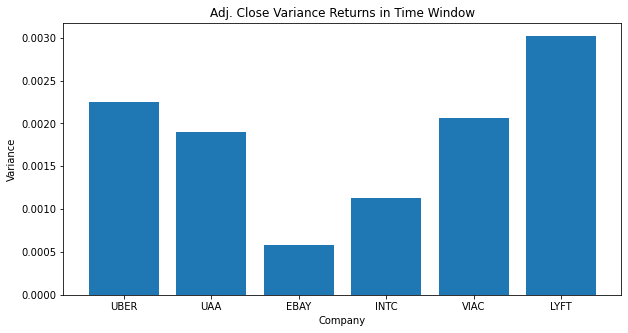

Uber (UBER):  0.002247099948046985
Under Armour (UAA):  0.001903054095184007
Ebay (EBAY):  0.0005809899208123928
Intel (INTC):  0.0011313227978310136
ViacomCBS (VIAC):  0.0020647282451662498
Lyft (LYFT):  0.0030208032856353113


In [958]:
returns_var = returns_quarterly.var()

returns_var

fig, ax = plt.subplots(figsize=(10, 5))
plt.bar(range(len(returns_var["Adj Close"])),returns_var["Adj Close"]) 
ax.set_xticks(range(len(returns_var["Adj Close"])))
ax.set_xticklabels(['UBER', 'UAA', 'EBAY', 'INTC', 'VIAC', 'LYFT'])
plt.xlabel("Company")
plt.ylabel("Variance")
plt.title("Adj. Close Variance Returns in Time Window")
plt.savefig("Portfolio3/CapstoneOpt3_VarianceReturns.png")
plt.show()

print("Uber (UBER): ", returns_var["Adj Close"]["UBER"])
print("Under Armour (UAA): ", returns_var["Adj Close"]["UAA"])
print("Ebay (EBAY): ", returns_var["Adj Close"]["EBAY"])
print("Intel (INTC): ", returns_var["Adj Close"]["INTC"])
print("ViacomCBS (VIAC): ", returns_var["Adj Close"]["VIAC"])
print("Lyft (LYFT): ", returns_var["Adj Close"]["LYFT"])

# Calculate and plot the standard deviation

1) Calculate the standard deviation
    * For each stock, calculate the standard deviation of the mean daily simple rate of return.

2) Plot the bar chart
    * Use matplotlib to create a bar chart comparing the standard deviation of the mean daily simple rate of return of each stock. Label the chart appropriately

3) Analyze the standard deviation
    * Based on the standard deviation of the rates of return, which stock would you choose to invest in and why?

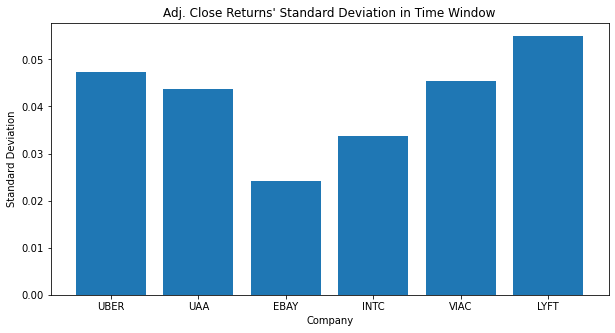

Uber (UBER):  0.04740358581422913
Under Armour (UAA):  0.04362400824298482
Ebay (EBAY):  0.02410373250789995
Intel (INTC):  0.03363514230430746
ViacomCBS (VIAC):  0.0454392808610155
Lyft (LYFT):  0.05496183480957774


In [959]:
std_returns = returns_quarterly.std()

fig, ax = plt.subplots(figsize=(10, 5))
plt.bar(range(len(std_returns["Adj Close"])),std_returns["Adj Close"]) 
ax.set_xticks(range(len(std_returns["Adj Close"])))
ax.set_xticklabels(['UBER', 'UAA', 'EBAY', 'INTC', 'VIAC', 'LYFT'])
plt.xlabel("Company")
plt.ylabel("Standard Deviation")
plt.title("Adj. Close Returns' Standard Deviation in Time Window")
plt.savefig("Portfolio3/CapstoneOpt3_Returns_Stdv.png")
plt.show()


print("Uber (UBER): ", std_returns["Adj Close"]["UBER"])
print("Under Armour (UAA): ", std_returns["Adj Close"]["UAA"])
print("Ebay (EBAY): ", std_returns["Adj Close"]["EBAY"])
print("Intel (INTC): ", std_returns["Adj Close"]["INTC"])
print("ViacomCBS (VIAC): ", std_returns["Adj Close"]["VIAC"])
print("Lyft (LYFT): ", std_returns["Adj Close"]["LYFT"])

# Calculate the correlations
Calculate the correlations between each of the stocks. Which stocks are positively correlated? Which are negatively correlated? Which have little correlation?

In [960]:
cov_returns = returns_quarterly["Adj Close"].cov()

In [961]:
cov_returns

Symbols,UBER,UAA,EBAY,INTC,VIAC,LYFT
Symbols,,,,,,
UBER,0.002247,0.000870,0.000206,0.000514,0.000896,0.002083
UAA,0.000870,0.001903,0.000267,0.000589,0.001123,0.001334
EBAY,0.000206,0.000267,0.000581,0.000313,0.000268,0.000221
INTC,0.000514,0.000589,0.000313,0.001131,0.000561,0.000673
VIAC,0.000896,0.001123,0.000268,0.000561,0.002065,0.001311
LYFT,0.002083,0.001334,0.000221,0.000673,0.001311,0.003021


# Portfolio Optimization

   Returns  Volatility  UBER Weight  UAA Weight  EBAY Weight  INTC Weight  \
0   0.0012      0.0341       0.2484      0.4290       0.0001       0.1801   
1   0.0013      0.0314       0.0724      0.1344       0.1543       0.2095   
2   0.0010      0.0339       0.0742      0.3186       0.0099       0.2432   
3   0.0012      0.0277       0.0451      0.0636       0.2572       0.3110   
4   0.0017      0.0396       0.2978      0.3040       0.0289       0.0133   

   VIAC Weight  LYFT Weight  
0       0.0874       0.0550  
1       0.1630       0.2664  
2       0.1514       0.2027  
3       0.1007       0.2224  
4       0.0577       0.2984  


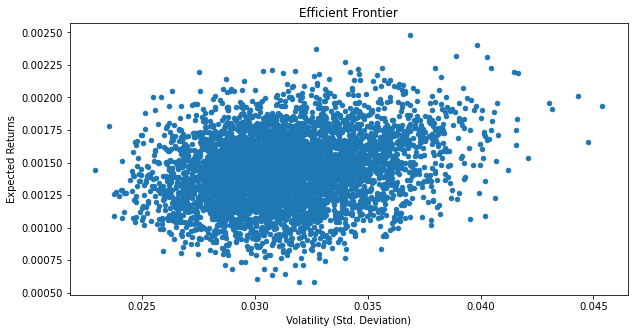

In [962]:
expected_returns = returns_quarterly['Adj Close'].mean()

cov_returns = returns_quarterly['Adj Close'].cov()

# had to adjust this function from the class lesson as "can only concatenate tuple (not str) to tuple"
def return_portfolios(expected_returns, cov_matrix):
    np.random.seed(1)
    port_returns = []
    port_volatility = []
    stock_weights = []
    
    selected = (expected_returns.axes)[0]
    
    num_assets = len(selected) 
    num_portfolios = 5000
    
    for single_portfolio in range(num_portfolios):
        weights = np.random.random(num_assets)
        weights /= np.sum(weights)
        returns = np.dot(weights, expected_returns)
        volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
        port_returns.append(returns)
        port_volatility.append(volatility)
        stock_weights.append(weights)
    
    portfolio = {'Returns': port_returns,
                 'Volatility': port_volatility}
    for counter,symbol in enumerate(selected):
        portfolio[f"{symbol} Weight"] = [Weight[counter] for Weight in stock_weights]
    
    df = pd.DataFrame(portfolio)
    
    column_order = ['Returns', 'Volatility'] + [f"{stock} Weight" for stock in selected]
    
    df = df[column_order]
   
    return df

random_portfolios = return_portfolios(expected_returns, cov_returns) 
print(random_portfolios.head().round(4))

random_portfolios.plot.scatter(x='Volatility', y='Returns', figsize=(10,5))
plt.title("Efficient Frontier")
plt.xlabel("Volatility (Std. Deviation)")
plt.ylabel("Expected Returns")
plt.savefig("Portfolio3/CapstoneOpt3_EfficientFrontier_nooptimumline.png")
plt.show()

In [963]:
returns_quarterly = returns_quarterly['Adj Close']

n = returns_quarterly.shape[1]
n

6

In [964]:
#to_matrix() was deprecated so I replaced with ".values"
def optimal_portfolio(returns):
    n = returns.shape[1]
    returns = np.transpose(returns.values)

    N = 100
    mus = [10**(5.0 * t/N - 1.0) for t in range(N)]

    # Convert to cvxopt matrices
    S = opt.matrix(np.cov(returns))
    pbar = opt.matrix(np.mean(returns, axis=1))

    # Create constraint matrices
    G = -opt.matrix(np.eye(n))   # negative n x n identity matrix
    h = opt.matrix(0.0, (n ,1))
    A = opt.matrix(1.0, (1, n))
    b = opt.matrix(1.0)

    # Calculate efficient frontier weights using quadratic programming
    portfolios = [solvers.qp(mu*S, -pbar, G, h, A, b)['x']
                  for mu in mus]
    ## CALCULATE RISKS AND RETURNS FOR FRONTIER
    returns = [blas.dot(pbar, x) for x in portfolios]
    risks = [np.sqrt(blas.dot(x, S*x)) for x in portfolios]
    ## CALCULATE THE 2ND DEGREE POLYNOMIAL OF THE FRONTIER CURVE
    m1 = np.polyfit(returns, risks, 2)
    x1 = np.sqrt(m1[2] / m1[0])
    # CALCULATE THE OPTIMAL PORTFOLIO
    wt = solvers.qp(opt.matrix(x1 * S), -pbar, G, h, A, b)['x']
    return np.asarray(wt), returns, risks

In [965]:
weights, returns, risks = optimal_portfolio(returns_quarterly[1:])

     pcost       dcost       gap    pres   dres
 0: -1.3879e-03 -1.0031e+00  1e+00  0e+00  3e+00
 1: -1.3899e-03 -1.3130e-02  1e-02  1e-16  3e-02
 2: -1.5512e-03 -3.2238e-03  2e-03  4e-17  5e-03
 3: -2.8943e-03 -3.8714e-03  1e-03  1e-15  1e-03
 4: -3.0705e-03 -3.0933e-03  2e-05  4e-18  3e-05
 5: -3.0852e-03 -3.0855e-03  2e-07  1e-16  3e-07
 6: -3.0854e-03 -3.0854e-03  2e-09  3e-16  3e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -1.3822e-03 -1.0031e+00  1e+00  3e-16  3e+00
 1: -1.3842e-03 -1.3122e-02  1e-02  2e-16  3e-02
 2: -1.5452e-03 -3.2148e-03  2e-03  7e-17  5e-03
 3: -2.8865e-03 -3.8577e-03  1e-03  4e-16  1e-03
 4: -3.0572e-03 -3.0795e-03  2e-05  1e-16  3e-05
 5: -3.0715e-03 -3.0718e-03  2e-07  1e-16  3e-07
 6: -3.0717e-03 -3.0717e-03  2e-09  1e-16  3e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -1.3758e-03 -1.0031e+00  1e+00  0e+00  3e+00
 1: -1.3779e-03 -1.3113e-02  1e-02  9e-17  3e-02
 2: -1.5385e-03 -3.2047e

 6: -8.5224e-05 -8.5858e-05  6e-07  6e-17  1e-18
 7: -8.5809e-05 -8.5821e-05  1e-08  2e-16  1e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  2.6481e-03 -1.0032e+00  1e+00  2e-16  3e+00
 1:  2.6288e-03 -1.3198e-02  2e-02  2e-16  5e-02
 2:  1.7144e-03 -2.0844e-03  4e-03  2e-16  9e-03
 3:  4.6602e-04 -4.9639e-04  1e-03  4e-17  6e-18
 4:  2.5622e-04  1.0353e-04  2e-04  2e-16  2e-18
 5:  1.8326e-04  1.6849e-04  1e-05  6e-17  1e-18
 6:  1.7301e-04  1.7200e-04  1e-06  3e-16  8e-19
 7:  1.7227e-04  1.7219e-04  8e-08  3e-16  2e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  3.1380e-03 -1.0034e+00  1e+00  0e+00  3e+00
 1:  3.1139e-03 -1.3340e-02  2e-02  8e-17  5e-02
 2:  2.0366e-03 -1.9814e-03  4e-03  9e-17  1e-02
 3:  7.4680e-04 -2.2729e-04  1e-03  2e-16  2e-18
 4:  5.4049e-04  3.8289e-04  2e-04  3e-17  2e-18
 5:  4.7099e-04  4.5450e-04  2e-05  2e-16  2e-18
 6:  4.6108e-04  4.5979e-04  1e-06  1e-16  1e-18
 7:  4.6032e-04  4.6027

 6:  1.9744e-02  1.9744e-02  2e-08  1e-16  2e-17
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  3.8906e-02 -1.0092e+00  1e+00  0e+00  3e+00
 1:  3.7234e-02 -1.6832e-02  5e-02  6e-17  2e-01
 2:  2.3946e-02  8.8131e-03  2e-02  1e-16  3e-17
 3:  2.2647e-02  2.1574e-02  1e-03  4e-17  2e-17
 4:  2.2406e-02  2.2296e-02  1e-04  1e-16  2e-17
 5:  2.2363e-02  2.2361e-02  2e-06  2e-16  1e-17
 6:  2.2362e-02  2.2362e-02  2e-08  2e-16  2e-17
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  4.3201e-02 -1.0092e+00  1e+00  1e-16  3e+00
 1:  4.1198e-02 -1.6363e-02  6e-02  7e-17  2e-01
 2:  2.6968e-02  1.1141e-02  2e-02  1e-16  5e-17
 3:  2.5595e-02  2.4499e-02  1e-03  1e-16  1e-17
 4:  2.5342e-02  2.5235e-02  1e-04  2e-16  1e-17
 5:  2.5299e-02  2.5298e-02  2e-06  1e-16  2e-17
 6:  2.5298e-02  2.5298e-02  2e-08  2e-16  2e-17
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  4.7905e-02 -1.0091e+00  1e+00  2e-16  3e+00


In [966]:
print(weights)

symbols

[[9.99999310e-01]
 [1.92032380e-07]
 [3.20217339e-08]
 [1.81798088e-07]
 [2.10262420e-07]
 [7.35460748e-08]]


['UBER', 'UAA', 'EBAY', 'INTC', 'VIAC', 'LYFT']

In [967]:
companies = ["Uber", "Under Armour", "Ebay", "Intel", "ViacomCBS", "Lyft"]

d = {'Company':companies, 'Symbol':symbols, 'Weight':[item for sublist in weights for item in sublist], 'Perc_Weight':["{:.1%}".format(item) for sublist in weights for item in sublist]}

d

{'Company': ['Uber', 'Under Armour', 'Ebay', 'Intel', 'ViacomCBS', 'Lyft'],
 'Symbol': ['UBER', 'UAA', 'EBAY', 'INTC', 'VIAC', 'LYFT'],
 'Weight': [0.9999993103393032,
  1.9203238042345396e-07,
  3.20217339063238e-08,
  1.8179808762871618e-07,
  2.1026242022605527e-07,
  7.354607476147443e-08],
 'Perc_Weight': ['100.0%', '0.0%', '0.0%', '0.0%', '0.0%', '0.0%']}

In [968]:
df = pd.DataFrame(d, columns=['Company','Symbol', 'Weight', 'Perc_Weight'])

df

,Company,Symbol,Weight,Perc_Weight
0,Uber,UBER,9.999993e-01,100.0%
1,Under Armour,UAA,1.920324e-07,0.0%
2,Ebay,EBAY,3.202173e-08,0.0%
3,Intel,INTC,1.817981e-07,0.0%
4,ViacomCBS,VIAC,2.102624e-07,0.0%
5,Lyft,LYFT,7.354607e-08,0.0%


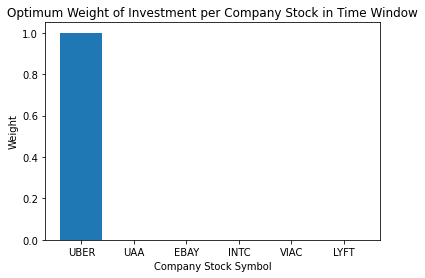

In [969]:
ax = plt.subplot()
plt.bar(range(len(df["Weight"])),df["Weight"]) 
ax.set_xticks(range(len(df["Weight"])))
ax.set_xticklabels(df["Symbol"])
plt.xlabel("Company Stock Symbol")
plt.ylabel("Weight")
plt.title("Optimum Weight of Investment per Company Stock in Time Window")
plt.savefig("Portfolio3/CapstoneOpt3_Opt_Weight_Invest_per_Company.png")
plt.show()

Appears to recommend your optimum portfolio has a very large weight (99.99%, nearly 100%) of Uber and very small distributions for the other five stocks. Of the small distributions, Under Armour, ViacomCBS, and Intel warrant slightly higher weights than Ebay and Lyft. The below chart shows the single standard deviation of each of the stocks and the efficient frontier. Lyft has the largest single standard deviation but only shows a medium amount of expected returns when compared to the other 5 stocks.

In [970]:
print(risks)

single_asset_std=np.sqrt(np.diagonal(cov_returns))

single_asset_std

[0.04740356658011746, 0.04740356678255766, 0.047403566140345556, 0.047403565203336835, 0.04740356396470888, 0.04740356231020598, 0.047403560072914026, 0.047403557001808386, 0.047403552701548196, 0.04740354643523016, 0.047403536864484876, 0.047403520703237834, 0.04740348744355974, 0.04740339208017886, 0.047402987456752636, 0.04739900616122624, 0.04701067973246135, 0.043202864253117625, 0.03987686292444704, 0.03702244920932066, 0.0345876060574466, 0.032523880363597296, 0.030786177587176274, 0.029332668131544136, 0.02812427691785524, 0.027126576513666952, 0.026306923219835292, 0.025637182297543023, 0.025092451089202328, 0.02465117596243742, 0.02429494347787863, 0.02400820246651939, 0.02377795017254406, 0.023593415533708865, 0.02344572119327548, 0.023327512978502093, 0.02323402791034695, 0.02315900373919371, 0.023098980116622078, 0.023045621822594776, 0.022970305749186536, 0.02288172534994152, 0.02275219921977073, 0.022597262609376445, 0.0224735148635078, 0.02236524760865153, 0.02227720852

array([0.04740359, 0.04362401, 0.02410373, 0.03363514, 0.04543928,
       0.05496183])

In [971]:
expected_returns

Symbols
UBER    0.003198
UAA     0.000424
EBAY    0.001922
INTC    0.000188
VIAC    0.000981
LYFT    0.001855
dtype: float64

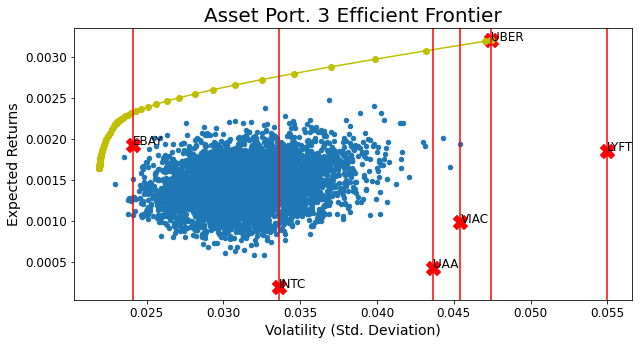

In [972]:
random_portfolios.plot.scatter(x='Volatility', y='Returns', fontsize=12, figsize=(10,5))
try:
    plt.plot(risks, returns, 'y-o')
except:
    pass

plt.scatter(single_asset_std,expected_returns,marker='X', color='red', s=200)
for i, txt in enumerate(symbols):
    plt.annotate(txt, (single_asset_std[i],expected_returns[i]), size=12)
for xc in single_asset_std:
    plt.axvline(x=xc, color='red')
plt.ylabel('Expected Returns',fontsize=14)
plt.xlabel('Volatility (Std. Deviation)',fontsize=14)
plt.title('Asset Port. 3 Efficient Frontier', fontsize=20)
plt.savefig("Portfolio3/CapstoneOpt3_EfficientFrontier_withline.png")
plt.show()

The vertical red lines in the figure to the right display the standard deviation of each asset. Compared to the previous portfolio of 6 stocks there are far fewer portfolio options with volatility lower than the least volatile asset. This means that there while these assets are more correlated than the last batch of six assets.

In [973]:
random_portfolios.sort_values(["Volatility"], ascending=False)

,Returns,Volatility,UBER Weight,UAA Weight,EBAY Weight,INTC Weight,VIAC Weight,LYFT Weight
3915,0.001931,0.045393,0.186214,0.030341,0.035169,0.030493,0.094602,0.623181
4354,0.001658,0.044740,0.063514,0.142931,0.050578,0.001349,0.090299,0.651329
2576,0.002013,0.044332,0.220784,0.065794,0.077905,0.015393,0.027618,0.592505
2649,0.001912,0.043152,0.288897,0.170509,0.009856,0.037381,0.029186,0.464171
2316,0.001956,0.043029,0.338126,0.227931,0.004365,0.007717,0.016496,0.405365
...,...,...,...,...,...,...,...,...
3893,0.001274,0.023874,0.036026,0.189969,0.450695,0.168678,0.122526,0.032106
456,0.001255,0.023780,0.085913,0.200415,0.406084,0.248214,0.047970,0.011404
1284,0.001088,0.023765,0.050784,0.098574,0.391946,0.409746,0.042357,0.006593
3399,0.001777,0.023544,0.216294,0.077077,0.487714,0.150796,0.045710,0.022410


The outcome of the optimum portfolio appears to make sense when I manually sort through the random portfolios I see that portfolios with the highest reutrns have a very high weight of Uber. Uber also does not have the highest single asset standard deviation (volatility) out of the bunch of assets.